In [1]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from scipy import signal
from scipy.fft import fft
from scipy.signal import periodogram
from cycler import cycler


%matplotlib qt5 
%matplotlib inline
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 22})

In [2]:
data_path = "..\\dataset\\"
datasets = dict()
# For national_illness OT is Total Patients
for f in ["electricity.csv", "ETTh1.csv", "ETTh2.csv", "ETTm1.csv", "ETTm2.csv", "exchange_rate.csv", "national_illness.csv", "traffic.csv", "weather.csv"]:
# for f in ["exchange_rate.csv"]:
#     print(f.replace(".csv",""))        
    dataset = pd.read_csv(data_path+f)
#     display(dataset.describe())
    datasets[f.replace(".csv","")] = dataset
    print(f.replace(".csv",""), datasets[f.replace(".csv","")].shape)

electricity (26304, 322)
ETTh1 (17420, 8)
ETTh2 (17420, 8)
ETTm1 (69680, 8)
ETTm2 (69680, 8)
exchange_rate (7588, 9)
national_illness (966, 8)
traffic (17544, 863)
weather (52696, 22)


In [79]:
from cycler import cycler
# %matplotlib qt5

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 18})

custom_cycler = (cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:8]) + 
             cycler(linestyle=['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 
                               (5, (10, 3)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1))]))
plt.rc('axes', prop_cycle=custom_cycler)

# Labels
datasets = ['Exchange rate', 'ETTh1', 'Weather', 'ILI']
models = ['Transformer', 'Autoformer', 'DLinear', 'NLinear']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:4]
path = "figures"
save = 1

# Format: [Transformer, Autoformer, DLinear, NLinear]
mse_values = [  [0.6012, 0.7810, 0.3613, 4.3394],  # Trans
                [0.1416, 0.4118, 0.2323, 3.1806],  # Auto
                [0.0816, 0.3815, 0.1609, 2.7127],  # DL
                [0.0886, 0.3849, 0.1645, 2.4468]]  # NL

std_values = [  [0.7484, 0.0932, 0.0304, 0.1821],  # Trans
                [0.0071, 0.0249, 0.0241, 0.1201],  # Auto
                [0.0027, 0.0004, 0.0008, 0.1492],  # DL
                [0.0007, 0.0027, 0.0006, 0.0674]]  # NL

mse = np.array(mse_values)
std = np.array(std_values)

n_datasets = len(datasets)
n_models = len(models)
bar_width = 0.2
x = np.arange(n_datasets)

plt.figure(figsize=(10,6), constrained_layout=True)

for i in range(n_models):
    bar_positions = x + i * bar_width
    bars = plt.bar(bar_positions, mse[i], yerr=std[i], capsize=3,
                   width=bar_width, label=models[i], color=colors[i], edgecolor='grey', alpha=0.85)
    for j, bar in enumerate(bars):
        y = mse[i][j] + std[i][j]
        std_val = std[i][j]
        plt.text(bar.get_x() + bar.get_width()/2.0, y + 0.1 * max(std[i]),
                 f"{std_val:.4f}", ha='center', va='bottom', fontsize=14, rotation=60)

plt.xticks(x + bar_width * (n_models - 1) / 2, datasets)
plt.tick_params(axis='both',which='both',bottom=False,left=True,top=False) 
plt.xlabel("Datasets")
plt.ylabel("MSE")
# print(plt.ylim())
plt.ylim(top=5.2)
plt.legend(title="Models", loc="upper left")


plt.grid(axis='y', linestyle='--', alpha=0.8)
# plt.tight_layout()
if save:
    plt.savefig(path+"\models_perf.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [72]:
plt.ylim?

In [ ]:
%matplotlib inline

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 16})

for dataset_key in ["exchange_rate"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"

    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    weeks = 52
    fig, axes = plt.subplots(2, figsize=(10,6), constrained_layout=True)
    lags=weeks*7

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_acf(dset[feat], use_vlines=False, adjusted=True, zero=True, lags=lags, ax=axes[0], alpha=0.05, marker=marker, markersize=3)

    axes[0].set_xticks(np.arange(0,lags+1,24)) # x in days
    axes[0].set_title("")
    axes[0].set(ylabel='ACF')
    axes[0].set(xlabel='lags (in days)')
    axes[0].grid(axis='x')
    axes[0].tick_params(axis='y', rotation=90)
#     axes[0].axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
    print(axes[0].get_ylim())
#     for i in range(0,30,2):
#         axes[0].add_patch(Rectangle((0+i,axes[0].get_ylim()[0]),96,abs(axes[0].get_ylim()[0])+abs(axes[0].get_ylim()[1]),
#                           alpha=0.05, facecolor='grey'))
    axes[0].add_patch(Rectangle((0,axes[0].get_ylim()[0]),96,abs(axes[0].get_ylim()[0])+abs(axes[0].get_ylim()[1]),
                      alpha=0.25, facecolor='grey'))
#     axes[0].add_patch(Rectangle((0+10,axes[0].get_ylim()[0]),96,abs(axes[0].get_ylim()[0])+abs(axes[0].get_ylim()[1]),
#                       alpha=0.2, facecolor='grey'))
#     axes[0].add_patch(Rectangle((0+20,axes[0].get_ylim()[0]),96,abs(axes[0].get_ylim()[0])+abs(axes[0].get_ylim()[1]),
#                       alpha=0.2, facecolor='grey'))
#     axes[0].add_patch(Rectangle((0+30,axes[0].get_ylim()[0]),96,abs(axes[0].get_ylim()[0])+abs(axes[0].get_ylim()[1]),
#                       alpha=0.2, facecolor='grey'))
    mid = axes[0].get_ylim()[1]-(abs(axes[0].get_ylim()[1])+abs(axes[0].get_ylim()[0]))/2
    axes[0].annotate("", xytext=(0, mid), xy=(96+10, mid),
            arrowprops=dict(arrowstyle="->",alpha=0.6))

    
    weeks = 16
    lags=weeks*7
    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_pacf(dset[feat], use_vlines=False, zero=True, lags=lags, ax=axes[1], alpha=0.05, marker=marker, markersize=3)

    axes[1].set_xticks(np.arange(0,lags+1,8)) # x in days
    axes[1].set_title("")
    axes[1].set(ylabel='PACF')
    axes[1].set(xlabel='lags (in days)')
    axes[1].grid(axis='x')
    axes[1].tick_params(axis='y', rotation=90)
#     axes[1].axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
    axes[1].add_patch(Rectangle((0,axes[1].get_ylim()[0]),96,abs(axes[1].get_ylim()[0])+abs(axes[1].get_ylim()[1]),
                      alpha=0.25, facecolor='grey'))
    mid = axes[1].get_ylim()[1]-(abs(axes[1].get_ylim()[1])+abs(axes[1].get_ylim()[0]))/2
    axes[1].annotate("", xytext=(0, mid), xy=(96+3, mid),
            arrowprops=dict(arrowstyle="->",alpha=0.6))
    
    plt.legend(dset.drop("date",axis = 1).columns, loc="lower left", mode = "expand", ncol = len(dset.drop("date",axis = 1).columns), bbox_to_anchor=(0, -0.6, 1, 4), handletextpad=0, markerscale=2)
    
    if save:
        plt.savefig(path+"\{}_acf_pacf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")
    
    plt.show()


In [17]:
# %matplotlib inline
%matplotlib qt5

dataset_key = "ETTh2"
dset = datasets[dataset_key]
dset.date = pd.to_datetime(dset.date, unit='ns')
print(dset.dtypes)
print(dset.shape )

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 16})

axes = dset.drop("date",axis = 1)[7500-2500:7500+2500].plot(subplots=False, figsize=(16, 4), linewidth=0.7).legend(loc='center right') # , linewidth=1.5
# axes = dset.drop("date",axis = 1)[:].plot(subplots=True, figsize=(10, 20)) # , linewidth=1.5
# axes = axes.flat
# fig = axes[0].get_figure()
# for ax in axes:
#     ax.legend(loc='upper center', bbox_to_anchor=(1, 1.3))


# .legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
plt.tight_layout()
plt.show()

# dset = datasets["exchange_rate"].loc[:, datasets["exchange_rate"].columns != 'date']

date    datetime64[ns]
HUFL           float64
HULL           float64
MUFL           float64
MULL           float64
LUFL           float64
LULL           float64
OT             float64
dtype: object
(17420, 8)


In [210]:
dset[col_rg_4]

,wv (m/s),max. PAR (mol/m/s),OT
0,1.02,0.0,428.1
1,0.43,0.0,428.0
2,0.61,0.0,427.6
3,1.11,0.0,430.0
4,0.49,0.0,432.2
...,...,...,...
52691,0.73,0.0,433.0
52692,0.43,0.0,439.6
52693,0.38,0.0,435.2
52694,0.57,0.0,433.9


In [ ]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 18})

for dataset_key in ["exchange_rate"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)

    save = 1
    weeks = 52
    fig, ax = plt.subplots(1, figsize=(10,3))
    lags=weeks*7

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_acf(dset[feat], use_vlines=False, adjusted=True, zero=True, lags=lags, ax=ax, alpha=0.05, marker=marker, markersize=3)

    ax.set_xticks(np.arange(0,lags+1,24)) # x in days
    ax.set_title("")
    ax.axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
    plt.legend(dset.drop("date",axis = 1).columns, loc="lower left", mode = "expand", ncol = len(dset.drop("date",axis = 1).columns), bbox_to_anchor=(0, 1.2, 1, 4), handletextpad=0, markerscale=3)
    
    if save:
        plt.savefig(path+"\{}_acf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")

    plt.show()


In [272]:
col_rg_0

['T (degC)',
 'Tdew (degC)',
 'rh (%)',
 'VPmax (mbar)',
 'VPact (mbar)',
 'VPdef (mbar)',
 'sh (g/kg)',
 'H2OC (mmol/mol)',
 'max. wv (m/s)',
 'rain (mm)',
 'Tlog (degC)']

In [29]:
dset.shape[0]

7588

In [23]:
from cycler import cycler

%matplotlib qt5

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 16})
# plt.rcParams.update({'font.size': 20})

custom_cycler = (cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:8]) + 
             cycler(linestyle=['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 
                               (5, (10, 3)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1))]))
plt.rc('axes', prop_cycle=custom_cycler)

# for dataset_key in ["ETTh1", "ETTh2", "ETTm1", "ETTm2", "exchange_rate"]:
for dataset_key in ["ETTh1", "exchange_rate"]:
# for dataset_key in ["ETTh1"]:
    save = 0
    path = "figures/datasets"
#     path = "figures/datasets/basic"
    dset = datasets[dataset_key][:]
    dset.date = pd.to_datetime(dset.date, unit='ns')

    if "ETT" in dataset_key:
        figsize=(16, 2.5)
        mult=0.3
#         mult=0.45
    elif dataset_key=="exchange_rate":  
        figsize=(16, 2.5)
        mult=0.4
    fig = plt.figure(figsize=figsize, constrained_layout=True)

    for feat in dset.drop("date", axis=1).columns:
        plt.plot(dset[feat], linewidth=1.)
    if dataset_key=="ETTh1" or dataset_key=="ETTh2":
        time_res="hourly time resolution"
    elif dataset_key=="ETTm1" or dataset_key=="ETTm2":
        time_res="15-minute time resolution"
    elif dataset_key=="exchange_rate":
        time_res="daily time resolution"
    else:
        time_res="unknown"
    plt.xlabel("Time steps: {}".format(time_res))
#     plt.ylim()
    lims = plt.gca().get_ylim()
    plt.gca().set_ylim(lims[0]-(lims[1]-lims[0])*mult,lims[1])
    plt.yticks(rotation='vertical')
#     legend = plt.legend(dset.drop("date", axis=1).columns, loc="lower left", mode = "expand", ncol = len(dset.drop("date", axis=1).columns), bbox_to_anchor=(0, 1, 1, 4), handletextpad=0.3, markerscale=10)
#     legend = plt.legend(dset.drop("date", axis=1).columns, loc="lower left", mode = "expand", ncol = len(dset.drop("date", axis=1).columns), bbox_to_anchor=(0, 0, 1, 4), handletextpad=1, markerscale=10)
    if dataset_key=="exchange_rate":
        legend = plt.legend([str(i) for i in range(len(dset.drop("date",axis = 1).columns))], loc="lower center", ncol = len(dset.drop("date", axis=1).columns), bbox_to_anchor=(0.5, -0.025), handletextpad=0.5, markerscale=10)
    else:
        legend = plt.legend(dset.drop("date", axis=1).columns, loc="lower center", ncol = len(dset.drop("date", axis=1).columns), bbox_to_anchor=(0.5, -0.025), handletextpad=0.5, markerscale=10)
#     legend = plt.legend(dset.drop("date", axis=1).columns, loc="lower left", ncol = len(dset.drop("date", axis=1).columns), bbox_to_anchor=(0, -0.3, 1, 4), handletextpad=0.3)
    for leg in legend.legendHandles:
        leg.set_linewidth(1.5)

    if save:
        plt.savefig(path+"\{}_dset_v1.pdf".format(dataset_key), format="pdf", bbox_inches="tight")
#     plt.tight_layout()
    plt.show()

In [4]:
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf',
 '#1f77b4']

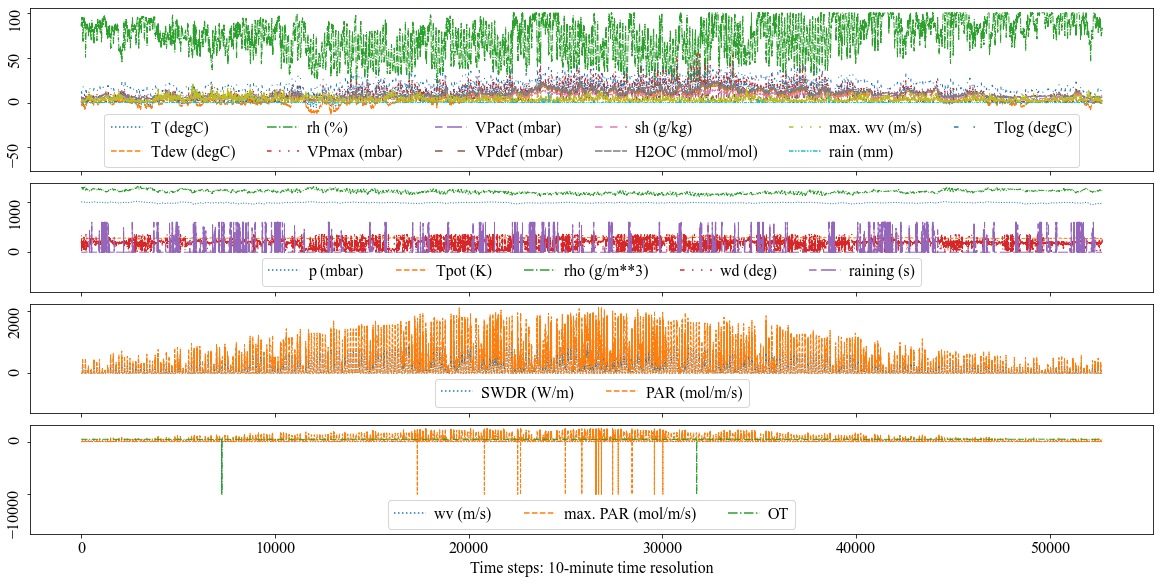

In [3]:
from cycler import cycler

# %matplotlib qt5

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 16})

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors.append(plt.rcParams['axes.prop_cycle'].by_key()['color'][0])

custom_cycler = (cycler(color=colors) + 
             cycler(linestyle=['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 
                               (5, (10, 3)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1)), 
                               (0, (3, 5, 1, 5, 1, 5)), (0, (3, 1, 1, 1, 1, 1)), (0, (3, 10, 1, 10))]))
plt.rc('axes', prop_cycle=custom_cycler)

save = 1
path = "figures/datasets"
dataset_key = "weather"
dset = datasets[dataset_key]
dset.date = pd.to_datetime(dset.date, unit='ns')

# Between 0 and 100
col_rg_0 = ['T (degC)','Tdew (degC)','rh (%)','VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)','sh (g/kg)',
            'H2OC (mmol/mol)','max. wv (m/s)','rain (mm)','Tlog (degC)']
# Between 0 and 1000
col_rg_1 = ['p (mbar)','Tpot (K)','rho (g/m**3)','wd (deg)','raining (s)']
# Between 0 and 2000
col_rg_2 = ['SWDR (W/m)','PAR (mol/m/s)']
# Between 0 and -10000
col_rg_3 = ['wv (m/s)','max. PAR (mol/m/s)','OT']

col_rg_1_2 = ['p (mbar)','Tpot (K)','rho (g/m**3)','wd (deg)','raining (s)','SWDR (W/m)','PAR (mol/m/s)']

fig, axes = plt.subplots(4, figsize=(16, 8), sharex=True, constrained_layout=True, gridspec_kw={'height_ratios': [1.5, 1, 1, 1]})

for feat in col_rg_0:
    axes[0].plot(dset[feat], linewidth=1.)
# legend = axes[0].legend(col_rg_0, loc="lower left", mode = "expand", ncol = 6, bbox_to_anchor=(0, 0.975, 1, 4), handletextpad=0.3, markerscale=10)
lims =  axes[0].get_ylim()
axes[0].set_ylim(lims[0]-(lims[1]-lims[0])*0.45,lims[1])
axes[0].tick_params(axis='y', rotation=90)
# legend = axes[0].legend(col_rg_0, loc="lower left", mode = "expand", ncol = 6, bbox_to_anchor=(0, 0, 1, 4), handletextpad=0.5, markerscale=10)
legend = axes[0].legend(col_rg_0, loc="lower center", ncol = 6, bbox_to_anchor=(0.5, -0.025), handletextpad=0.5, markerscale=10)
for leg in legend.legendHandles:
    leg.set_linewidth(1.5)
    
for feat in col_rg_1:
    axes[1].plot(dset[feat], linewidth=1.)
# legend = axes[1].legend(col_rg_1, loc="lower left", mode = "expand", ncol = 5, bbox_to_anchor=(0, 0.975, 0.7, 4), handletextpad=0.3, markerscale=1)
lims =  axes[1].get_ylim()
axes[1].set_ylim(lims[0]-(lims[1]-lims[0])*0.5,lims[1])
axes[1].tick_params(axis='y', rotation=90)
# axes[1].yticks(rotation='vertical')
# legend = axes[1].legend(col_rg_1, loc="lower left", mode = "expand", ncol = 5, bbox_to_anchor=(0, 0, 1, 4), handletextpad=0.5, markerscale=10)
legend = axes[1].legend(col_rg_1, loc="lower center", ncol = 5, bbox_to_anchor=(0.5, -0.025), handletextpad=0.5, markerscale=10)
for leg in legend.legendHandles:
    leg.set_linewidth(1.5)

for feat in col_rg_2:
    axes[2].plot(dset[feat], linewidth=1.)
# legend = axes[2].legend(col_rg_2, loc="lower left", mode = "expand", ncol = 2, bbox_to_anchor=(0, 0.975, 0.3, 4), handletextpad=0.3, markerscale=50)
lims =  axes[2].get_ylim()
axes[2].set_ylim(lims[0]-(lims[1]-lims[0])*0.5,lims[1])
axes[2].tick_params(axis='y', rotation=90)
# axes[2].yticks(rotation='vertical')
# legend = axes[2].legend(col_rg_2, loc="lower left", mode = "expand", ncol = 2, bbox_to_anchor=(0, 0, 1, 4), handletextpad=0.5, markerscale=10)
legend = axes[2].legend(col_rg_2, loc="lower center", ncol = 2, bbox_to_anchor=(0.5, -0.025), handletextpad=0.5, markerscale=10)
for leg in legend.legendHandles:
    leg.set_linewidth(1.5)

for feat in col_rg_3:
    axes[3].plot(dset[feat], linewidth=1.)
# legend = axes[3].legend(col_rg_3, loc="lower left", mode = "expand", ncol = 3, bbox_to_anchor=(0, 0.975, 0.4, 4), handletextpad=0.3, markerscale=100)
lims =  axes[3].get_ylim()
axes[3].set_ylim(lims[0]-(lims[1]-lims[0])*0.5,lims[1])
axes[3].tick_params(axis='y', rotation=90)
# axes[3].yticks(rotation='vertical')
# legend = axes[3].legend(col_rg_3, loc="lower left", mode = "expand", ncol = 3, bbox_to_anchor=(0, 0, 1, 4), handletextpad=0.5, markerscale=10)
legend = axes[3].legend(col_rg_3, loc="lower center", ncol = 3, bbox_to_anchor=(0.5, -0.025), handletextpad=0.5, markerscale=10)
for leg in legend.legendHandles:
    leg.set_linewidth(1.5)

# plt.yticks(rotation='vertical')
time_res="10-minute time resolution"
plt.xlabel("Time steps: {}".format(time_res))

if save:
    plt.savefig(path+"\{}_dset_v1.pdf".format(dataset_key), format="pdf", bbox_inches="tight")

plt.show()

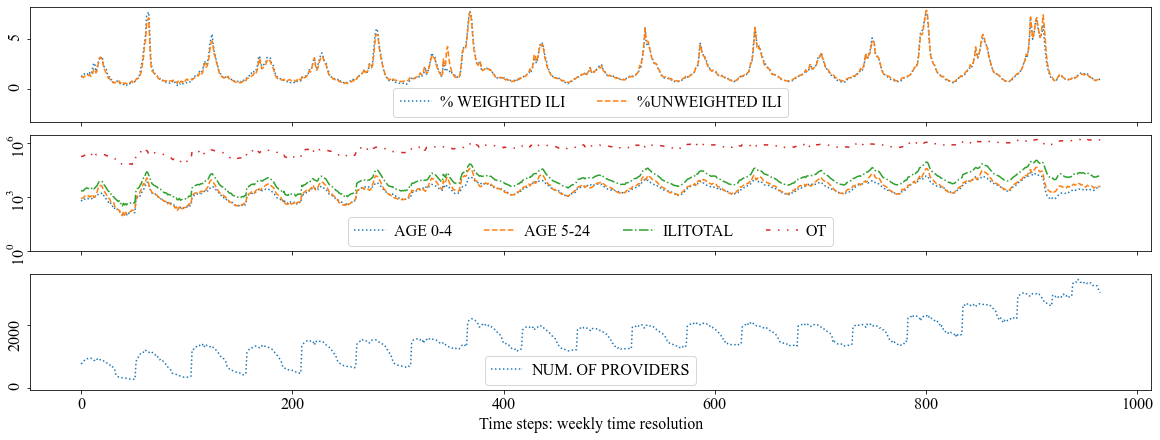

In [6]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 16})

custom_cycler = (cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:8]) + 
             cycler(linestyle=['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 
                               (5, (10, 3)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1))]))
plt.rc('axes', prop_cycle=custom_cycler)

save = 0
path = "figures/datasets"
dataset_key = "national_illness"
dset = datasets[dataset_key]
dset.date = pd.to_datetime(dset.date, unit='ns')

# Between 0 and 10
col_rg_0 = ['% WEIGHTED ILI', '%UNWEIGHTED ILI',]
# Between 0 and 500
col_rg_1 = ['AGE 0-4', 'AGE 5-24','ILITOTAL','OT']
# Between 0 and 30000
col_rg_2 = ['NUM. OF PROVIDERS']

fig, axes = plt.subplots(3, figsize=(16, 6), sharex=True, constrained_layout=True)

for feat in col_rg_0:
    axes[0].plot(dset[feat], linewidth=1.5)
# legend = axes[0].legend(col_rg_0, loc="lower left", mode = "expand", ncol = len(col_rg_0), bbox_to_anchor=(0.02, 0.975, 0.375, 4), handletextpad=0.3, markerscale=10)
lims =  axes[0].get_ylim()
axes[0].set_ylim(lims[0]-(lims[1]-lims[0])*0.4,lims[1])
axes[0].tick_params(axis='y', rotation=90)
legend = axes[0].legend(col_rg_0, loc="lower center", ncol = len(col_rg_0), bbox_to_anchor=(0.5, -0.025), handletextpad=0.5, markerscale=10)
for leg in legend.legendHandles:
    leg.set_linewidth(1.5)
    
for feat in col_rg_1:
    axes[1].plot(dset[feat], linewidth=1.5)
axes[1].set_yscale('log')
# legend = axes[1].legend(col_rg_1, loc="lower left", mode = "expand", ncol = len(col_rg_1), bbox_to_anchor=(0.02, 0.975, 0.45, 4), handletextpad=0.3, markerscale=1)
lims =  axes[1].get_ylim()
axes[1].set_ylim(1,lims[1])
axes[1].tick_params(axis='y', rotation=90, pad=-2)
legend = axes[1].legend(col_rg_1, loc="lower center", ncol = len(col_rg_1), bbox_to_anchor=(0.5, -0.025), handletextpad=0.5, markerscale=10)
for leg in legend.legendHandles:
    leg.set_linewidth(1.5)

for feat in col_rg_2:
    axes[2].plot(dset[feat], linewidth=1.5)
# legend = axes[2].legend(col_rg_2, loc="lower left", mode = "expand", ncol = len(col_rg_2), bbox_to_anchor=(0.02, 0.975, 0.205, 4), handletextpad=0.3, markerscale=50)
lims =  axes[2].get_ylim()
axes[2].set_ylim(lims[0]-(lims[1]-lims[0])*0.05,lims[1])
axes[2].tick_params(axis='y', rotation=90)
legend = axes[2].legend(col_rg_2, loc="lower center", ncol = len(col_rg_2), bbox_to_anchor=(0.5, -0.025), handletextpad=0.5, markerscale=10)
for leg in legend.legendHandles:
    leg.set_linewidth(1.5)
        
time_res="weekly time resolution"
plt.xlabel("Time steps: {}".format(time_res))

if save:
    plt.savefig(path+"\{}_dset_v1.pdf".format("ILI"), format="pdf", bbox_inches="tight")

plt.show()

## Looking for periodicities through acf and pacf

https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf#Periodical 

https://itsudit.medium.com/deciphering-acf-and-pacf-plots-a-guide-to-time-series-forecasting-3323948935fb

In [5]:
from cycler import cycler
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

%matplotlib inline 

# from cycler import cycler
# from matplotlib.colors import TABLEAU_COLORS
# custom_cycler = (cycler(color=[key for key in TABLEAU_COLORS.keys()][:dset_no_date.shape[1]])+
#                  cycler(marker=[key for key in Line2D.markers.keys()][:dset_no_date.shape[1]]))

# plt.rc('axes', prop_cycle=custom_cycler)

data_path = "dataset/"
datasets = dict()
# For national_illness OT is Total Patients
# For ETT, OT is Oil temperature
for f in ["electricity.csv", "ETTh1.csv", "ETTh2.csv", "ETTm1.csv", "ETTm2.csv", "exchange_rate.csv", "national_illness.csv", "traffic.csv", "weather.csv"]:
    dataset = pd.read_csv(data_path+f)
    datasets[f.replace(".csv","")] = dataset
    print(f.replace(".csv",""), datasets[f.replace(".csv","")].shape)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 16})

electricity (26304, 322)
ETTh1 (17420, 8)
ETTh2 (17420, 8)
ETTm1 (69680, 8)
ETTm2 (69680, 8)
exchange_rate (7588, 9)
national_illness (966, 8)
traffic (17544, 863)
weather (52696, 22)


In [6]:
%matplotlib qt5 
markers = [key for key in Line2D.markers.keys()]
markers.remove(",")

In [14]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 20})

for dataset_key in ["ETTh1"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets/basic"
    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    weeks = 14
    fig, axes = plt.subplots(2, figsize=(16,4), constrained_layout=True, sharex=True)
    lags=weeks*7

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_acf(dset[feat], use_vlines=False, adjusted=True, zero=True, lags=lags, ax=axes[0], alpha=None, marker=marker, markersize=3)

    axes[0].set_xticks(np.arange(0,lags+1,8)) # x in days
    axes[0].set_title("")
    axes[0].set(ylabel='ACF')
    axes[0].grid(axis='x')
    axes[0].set_ylim(bottom=-0.4)
    axes[0].tick_params(axis='y', rotation=90)
    axes[0].axhline(y = 0, color = 'grey', lw=0.5)
    
    weeks = 14
    lags=weeks*7
    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_pacf(dset[feat], use_vlines=False, zero=True, lags=lags, ax=axes[1], alpha=None, marker=marker, markersize=3)

    axes[1].set_xticks(np.arange(0,lags+1,8)) # x in days
    axes[1].set_title("")
    axes[1].set(ylabel='PACF')
    axes[1].set(xlabel='lags')
    axes[1].grid(axis='x')
    axes[1].set_ylim(bottom=-0.4)
    axes[1].tick_params(axis='y', rotation=90)
    axes[1].axhline(y = 0, color = 'grey', lw=0.5)
#     axes[1].axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
    plt.legend([str(i) for i in range(len(dset.drop("date",axis = 1).columns))], loc="lower center", ncol = len(dset.drop("date",axis = 1).columns), bbox_to_anchor=(0, -1.15, 1, 4), handletextpad=0, markerscale=1.25)
    
    if save:
        plt.savefig(path+"\{}_acf_pacf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")
    
    plt.show()


(-0.6373176353343205, 1.0779675064444914)


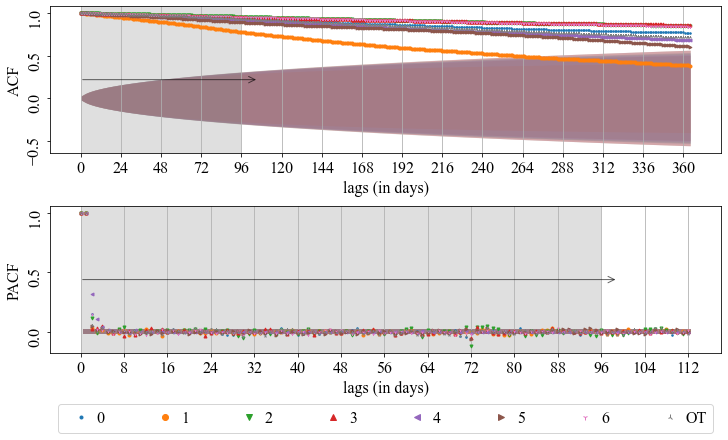

In [6]:
%matplotlib inline

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 16})

for dataset_key in ["exchange_rate"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    weeks = 52
    fig, axes = plt.subplots(2, figsize=(10,6), constrained_layout=True)
    lags=weeks*7

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_acf(dset[feat], use_vlines=False, adjusted=True, zero=True, lags=lags, ax=axes[0], alpha=0.05, marker=marker, markersize=3)

    axes[0].set_xticks(np.arange(0,lags+1,24)) # x in days
    axes[0].set_title("")
    axes[0].set(ylabel='ACF')
    axes[0].set(xlabel='lags (in days)')
    axes[0].grid(axis='x')
    axes[0].tick_params(axis='y', rotation=90)
#     axes[0].axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
    print(axes[0].get_ylim())
#     for i in range(0,30,2):
#         axes[0].add_patch(Rectangle((0+i,axes[0].get_ylim()[0]),96,abs(axes[0].get_ylim()[0])+abs(axes[0].get_ylim()[1]),
#                           alpha=0.05, facecolor='grey'))
    axes[0].add_patch(Rectangle((0,axes[0].get_ylim()[0]),96,abs(axes[0].get_ylim()[0])+abs(axes[0].get_ylim()[1]),
                      alpha=0.25, facecolor='grey'))
#     axes[0].add_patch(Rectangle((0+10,axes[0].get_ylim()[0]),96,abs(axes[0].get_ylim()[0])+abs(axes[0].get_ylim()[1]),
#                       alpha=0.2, facecolor='grey'))
#     axes[0].add_patch(Rectangle((0+20,axes[0].get_ylim()[0]),96,abs(axes[0].get_ylim()[0])+abs(axes[0].get_ylim()[1]),
#                       alpha=0.2, facecolor='grey'))
#     axes[0].add_patch(Rectangle((0+30,axes[0].get_ylim()[0]),96,abs(axes[0].get_ylim()[0])+abs(axes[0].get_ylim()[1]),
#                       alpha=0.2, facecolor='grey'))
    mid = axes[0].get_ylim()[1]-(abs(axes[0].get_ylim()[1])+abs(axes[0].get_ylim()[0]))/2
    axes[0].annotate("", xytext=(0, mid), xy=(96+10, mid),
            arrowprops=dict(arrowstyle="->",alpha=0.6))

    
    weeks = 16
    lags=weeks*7
    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_pacf(dset[feat], use_vlines=False, zero=True, lags=lags, ax=axes[1], alpha=0.05, marker=marker, markersize=3)

    axes[1].set_xticks(np.arange(0,lags+1,8)) # x in days
    axes[1].set_title("")
    axes[1].set(ylabel='PACF')
    axes[1].set(xlabel='lags (in days)')
    axes[1].grid(axis='x')
    axes[1].tick_params(axis='y', rotation=90)
#     axes[1].axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
    axes[1].add_patch(Rectangle((0,axes[1].get_ylim()[0]),96,abs(axes[1].get_ylim()[0])+abs(axes[1].get_ylim()[1]),
                      alpha=0.25, facecolor='grey'))
    mid = axes[1].get_ylim()[1]-(abs(axes[1].get_ylim()[1])+abs(axes[1].get_ylim()[0]))/2
    axes[1].annotate("", xytext=(0, mid), xy=(96+3, mid),
            arrowprops=dict(arrowstyle="->",alpha=0.6))
    
    plt.legend(dset.drop("date",axis = 1).columns, loc="lower left", mode = "expand", ncol = len(dset.drop("date",axis = 1).columns), bbox_to_anchor=(0, -0.6, 1, 4), handletextpad=0, markerscale=2)
    
    if save:
        plt.savefig(path+"\{}_acf_pacf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")
    
    plt.show()


In [41]:
["Feature "+str(i) for i in range(len(dset.drop("date",axis = 1).columns))]

['Feature 0',
 'Feature 1',
 'Feature 2',
 'Feature 3',
 'Feature 4',
 'Feature 5',
 'Feature 6',
 'Feature 7']

In [116]:
for dataset_key in ["ETTh1", "ETTh2"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    days = 6
    fig, axes = plt.subplots(2, figsize=(10,6), constrained_layout=True)
    lags=24*days

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_acf(dset[feat], use_vlines=False, adjusted=True, zero=True, lags=lags, ax=axes[0], alpha=0.05, marker=marker, markersize=3)

    axes[0].set_xticks(np.arange(0,lags+1,12)) # x in hours
    axes[0].set_title("")
    axes[0].set(ylabel='ACF')
    axes[0].set(xlabel='lags (in hours)')
    axes[0].grid(axis='x')
    axes[0].tick_params(axis='y', rotation=90)
#     axes[0].axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
    axes[0].add_patch(Rectangle((0,axes[0].get_ylim()[0]),96,abs(axes[0].get_ylim()[0])+abs(axes[0].get_ylim()[1]),
                      alpha=0.25, facecolor='grey'))
    mid = axes[0].get_ylim()[1]-(abs(axes[0].get_ylim()[1])+abs(axes[0].get_ylim()[0]))/2
    axes[0].annotate("", xytext=(0, mid), xy=(96+4, mid),
            arrowprops=dict(arrowstyle="->",alpha=0.6))

    days = 5
    lags=24*days

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_pacf(dset[feat], use_vlines=False, zero=True, lags=lags, ax=axes[1], alpha=0.05, marker=marker, markersize=3)

    axes[1].set_xticks(np.arange(0,lags+1,8)) # x in hours
    axes[1].set_title("")
    axes[1].set(ylabel='PACF')
    axes[1].set(xlabel='lags (in hours)')
    axes[1].grid(axis='x')
#     axes[1].axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
    axes[1].add_patch(Rectangle((0,axes[1].get_ylim()[0]),96,abs(axes[1].get_ylim()[0])+abs(axes[1].get_ylim()[1]),
                      alpha=0.25, facecolor='grey'))
    mid = axes[1].get_ylim()[1]-(abs(axes[1].get_ylim()[1])+abs(axes[1].get_ylim()[0]))/2
    axes[1].annotate("", xytext=(0, mid), xy=(96+3.5, mid),
            arrowprops=dict(arrowstyle="->",alpha=0.6))
    
    axes[1].tick_params(axis='y', rotation=90)
    
    plt.legend(dset.drop("date",axis = 1).columns, loc="lower center", mode = "expand", ncol = len(dset.drop("date",axis = 1).columns), bbox_to_anchor=(0, -0.6, 1, 4), handletextpad=0.0, markerscale=2)

    if save:
        plt.savefig(path+"\{}_acf_pacf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")

    plt.show()



In [117]:
for dataset_key in ["ETTm1", "ETTm2"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    days = 1.5
    fig, axes = plt.subplots(2, figsize=(10,6), constrained_layout=True)
    lags=24*days*4
    
    for feat, marker in zip(dset_no_date.columns, markers):
        plot_acf(dset[feat], use_vlines=False, adjusted=True, zero=True, lags=lags, ax=axes[0], alpha=0.05, marker=marker, markersize=3)

    axes[0].set_xticks(np.arange(0,lags+1,16))
    axes[0].set_xticklabels((axes[0].get_xticks()*15/60).astype("int32")) # x in hours
    axes[0].set_title("")
    axes[0].set(ylabel='ACF')
    axes[0].set(xlabel='lags (transformed from 15-minute to hours)')
    axes[0].grid(axis='x')
    axes[0].tick_params(axis='y', rotation=90)
#     axes[0].axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
    axes[0].add_patch(Rectangle((0,axes[0].get_ylim()[0]),96,abs(axes[0].get_ylim()[0])+abs(axes[0].get_ylim()[1]),
                      alpha=0.25, facecolor='grey'))
    mid = axes[0].get_ylim()[1]-(abs(axes[0].get_ylim()[1])+abs(axes[0].get_ylim()[0]))/2
    axes[0].annotate("", xytext=(0, mid), xy=(96+4, mid),
            arrowprops=dict(arrowstyle="->",alpha=0.6))

    days = 1.2
    lags=24*days*4

    for feat, marker in zip(dset_no_date.columns, markers):
        plot_pacf(dset[feat], use_vlines=False, zero=True, lags=lags, ax=axes[1], alpha=0.05, marker=marker, markersize=3)

    axes[1].set_xticks(np.arange(0,lags+1,6))
    axes[1].set_xticklabels((axes[1].get_xticks()*15/60).astype("int32")) # x in hours
    axes[1].set_title("")
    axes[1].set(ylabel='PACF')
    axes[1].set(xlabel='lags (transformed from 15-minute to hours)')
    axes[1].grid(axis='x')
#     axes[1].axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
    axes[1].tick_params(axis='y', rotation=90)
    axes[1].add_patch(Rectangle((0,axes[1].get_ylim()[0]),96,abs(axes[1].get_ylim()[0])+abs(axes[1].get_ylim()[1]),
                      alpha=0.25, facecolor='grey'))
    mid = axes[1].get_ylim()[1]-(abs(axes[1].get_ylim()[1])+abs(axes[1].get_ylim()[0]))/2
    axes[1].annotate("", xytext=(0, mid), xy=(96+3.3, mid),
            arrowprops=dict(arrowstyle="->",alpha=0.6))
    
    plt.legend(dset_no_date.columns, loc="lower center", mode = "expand", ncol = len(dset.drop("date",axis = 1).columns), bbox_to_anchor=(0, -0.6, 1, 4), handletextpad=0.0, markerscale=2)

    if save:
        plt.savefig(path+"\{}_acf_pacf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")

    plt.show()

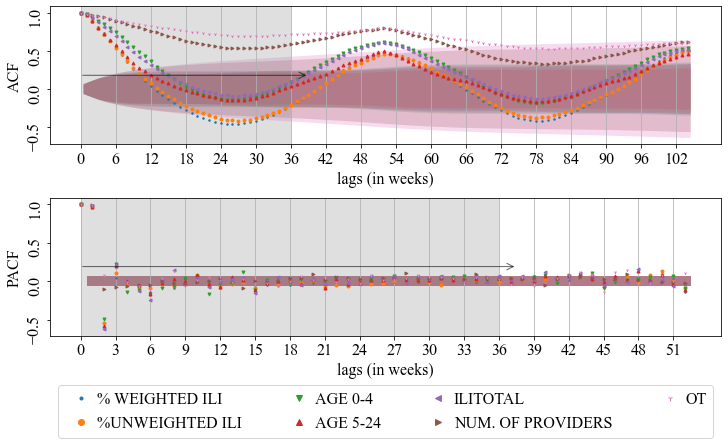

In [7]:
for dataset_key in ["national_illness"]: 
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    weeks = 104
    fig, axes = plt.subplots(2, figsize=(10,6), constrained_layout=True)
    lags=weeks
    
    for feat, marker in zip(dset_no_date.columns, markers):
        plot_acf(dset[feat], use_vlines=False, adjusted=True, zero=True, lags=lags, ax=axes[0], alpha=0.05, marker=marker, markersize=3)

    axes[0].set_xticks(np.arange(0,lags+1,6)) # x in weeks
    axes[0].set_title("")
    axes[0].set(ylabel='ACF')
    axes[0].set(xlabel='lags (in weeks)')
    axes[0].grid(axis='x')
    axes[0].tick_params(axis='y', rotation=90)
#     axes[0].axvline(x = 36, color = 'black', label = 'axvline - full height', lw=1)

    axes[0].add_patch(Rectangle((0,axes[0].get_ylim()[0]),36,abs(axes[0].get_ylim()[0])+abs(axes[0].get_ylim()[1]),
                      alpha=0.25, facecolor='grey'))
    mid = axes[0].get_ylim()[1]-(abs(axes[0].get_ylim()[1])+abs(axes[0].get_ylim()[0]))/2
    axes[0].annotate("", xytext=(0, mid), xy=(36+3, mid),
            arrowprops=dict(arrowstyle="->",alpha=0.6))

    weeks = 52
    lags=weeks

    for feat, marker in zip(dset_no_date.columns, markers):
        plot_pacf(dset[feat], use_vlines=False, zero=True, lags=lags, ax=axes[1], alpha=0.05, marker=marker, markersize=3)

    axes[1].set_xticks(np.arange(0,lags+1,3)) # x in weeks        
    axes[1].set_title("")
    axes[1].set(ylabel='PACF')
    axes[1].set(xlabel='lags (in weeks)')
    axes[1].grid(axis='x')
#     axes[1].axvline(x = 36, color = 'black', label = 'axvline - full height', lw=1)
    axes[1].tick_params(axis='y', rotation=90)

    axes[1].add_patch(Rectangle((0,axes[1].get_ylim()[0]),36,abs(axes[1].get_ylim()[0])+abs(axes[1].get_ylim()[1]),
                      alpha=0.25, facecolor='grey'))
    mid = axes[1].get_ylim()[1]-(abs(axes[1].get_ylim()[1])+abs(axes[1].get_ylim()[0]))/2
    axes[1].annotate("", xytext=(0, mid), xy=(36+1.5, mid),
            arrowprops=dict(arrowstyle="->",alpha=0.6))
    
    legend = axes[1].legend(dset_no_date.columns, loc="lower center", mode = "expand", ncol = 4, bbox_to_anchor=(0, -0.8, 1, 4), handletextpad=0.0, markerscale=2)

    if save:
        plt.savefig(path+"\{}_acf_pacf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")

    plt.show()


In [14]:
14000/32000 

0.4375

In [10]:
%matplotlib qt5 

for dataset_key in ["weather"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)
    
    save = 0
    days = 1.5
    fig, axes = plt.subplots(2, figsize=(10,5), constrained_layout=True)
    lags=days*24*6

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_acf(dset[feat], use_vlines=False, adjusted=True, zero=True, lags=lags, ax=axes[0], alpha=0.05, marker=marker, markersize=2)

    axes[0].set_xticks(np.arange(0,lags+1,12))
    axes[0].set_xticklabels((axes[0].get_xticks()*10/60).astype("int32")) # x in hours
    axes[0].set_title("")
    axes[0].set(ylabel='ACF')
    axes[0].set(xlabel='lags (transformed from 10-minute to hours)')
    axes[0].grid(axis='x')
    axes[0].tick_params(axis='y', rotation=90)
#     axes[0].axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)

    axes[0].add_patch(Rectangle((0,axes[0].get_ylim()[0]),96,abs(axes[0].get_ylim()[0])+abs(axes[0].get_ylim()[1]),
                      alpha=0.25, facecolor='grey'))
    mid = axes[0].get_ylim()[1]-(abs(axes[0].get_ylim()[1])+abs(axes[0].get_ylim()[0]))/2
    axes[0].annotate("", xytext=(0, mid), xy=(96+6, mid),
            arrowprops=dict(arrowstyle="->",alpha=0.6))

    days = 0.75
    lags=days*24*6

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_pacf(dset[feat], use_vlines=False, zero=True, lags=lags, ax=axes[1], alpha=0.1, marker=marker, markersize=2)

    axes[1].set_xticks(np.arange(0,lags+1,6))
    axes[1].set_xticklabels((axes[1].get_xticks()*10/60).astype("int32")) # x in hours
    axes[1].set_title("")
    axes[1].set(ylabel='PACF')
    axes[1].set(xlabel='lags (transformed from 10-minute to hours)')
    axes[1].grid(axis='x')
#     axes[1].axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
    axes[1].tick_params(axis='y', rotation=90)

    axes[1].add_patch(Rectangle((0,axes[1].get_ylim()[0]),96,abs(axes[1].get_ylim()[0])+abs(axes[1].get_ylim()[1]),
                      alpha=0.25, facecolor='grey'))
    mid = axes[1].get_ylim()[1]-(abs(axes[1].get_ylim()[1])+abs(axes[1].get_ylim()[0]))/2
    axes[1].annotate("", xytext=(0, mid), xy=(96+3, mid),
            arrowprops=dict(arrowstyle="->",alpha=0.6))
    
    legend = axes[1].legend(dset.drop("date",axis = 1).columns, loc="lower center", mode = "expand", ncol = 5, bbox_to_anchor=(0, -1.535, 1, 1), handletextpad=0.0, markerscale=2, fontsize="15")

    if save:
        plt.savefig(path+"\{}_acf_pacf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")

    plt.show()

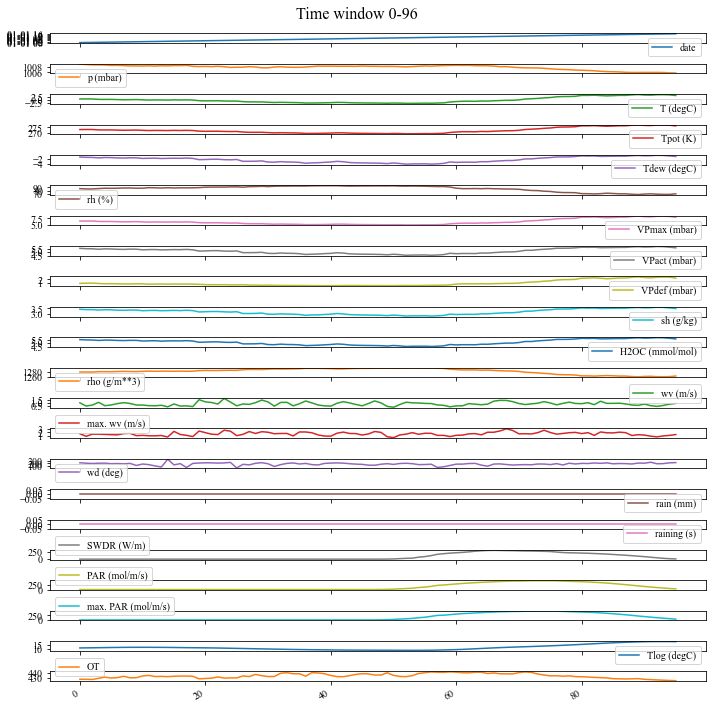

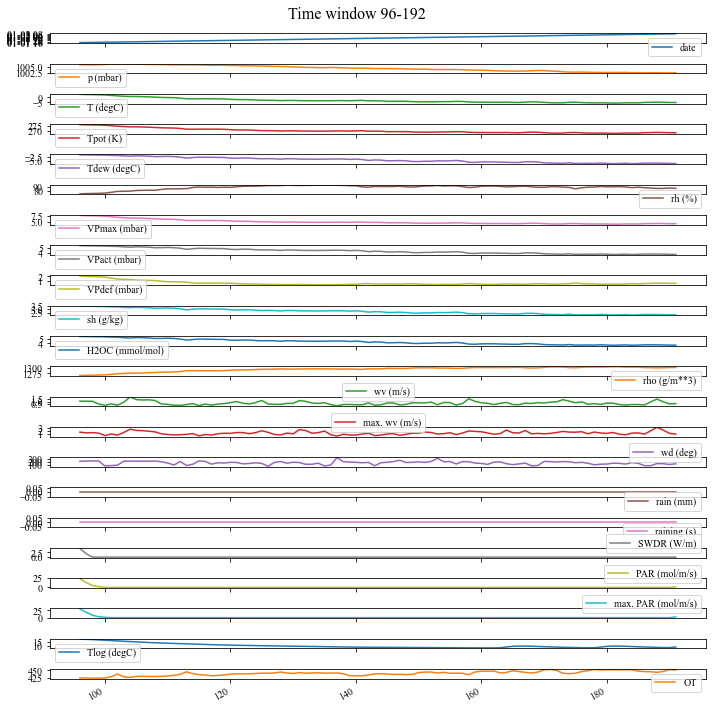

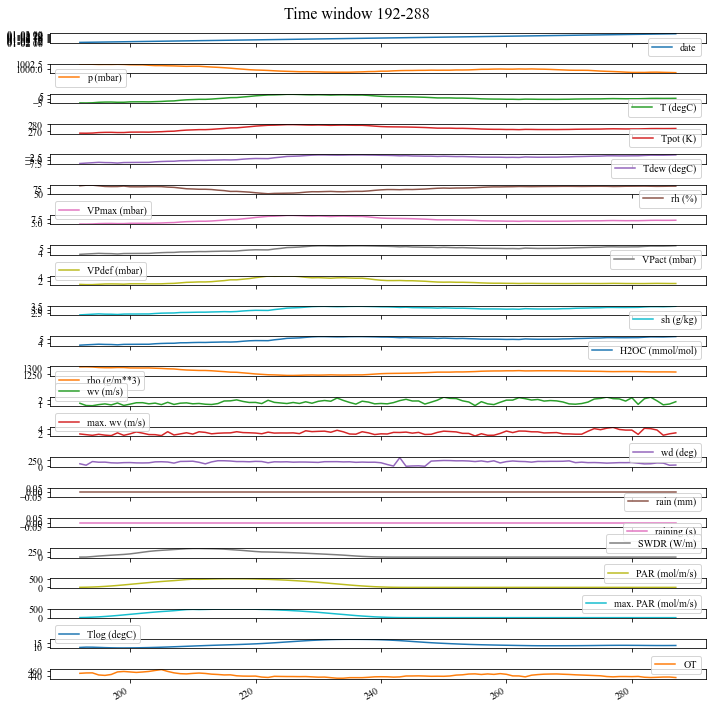

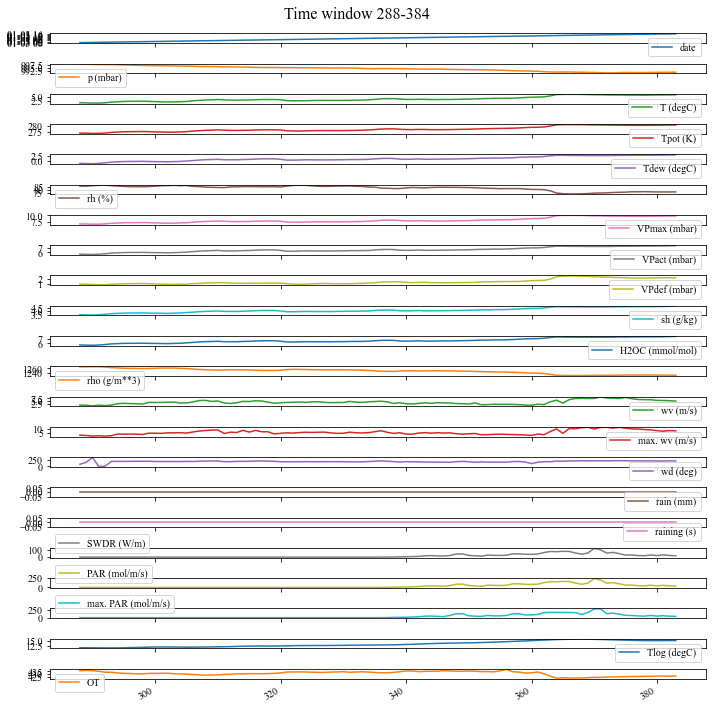

In [167]:
%matplotlib inline
# Checking distribution shifts
for time in range(4):
    dset[96*time:96*time+96].plot(subplots=True, figsize=(10, 10))
    plt.suptitle("Time window {}-{}".format(time*96,time*96+96), fontsize=16)
    plt.tight_layout()
    plt.show()
    
    
    

In [168]:
# Checking distribution shifts
for time in range(4):
    print("Time window {}-{}".format(time*96,time*96+96))
    display(dset[96*time:96*time+96].describe())

Time window 0-96


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m),PAR (mol/m/s),max. PAR (mol/m/s),Tlog (degC),OT
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.0,96.0,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1007.766875,-0.192604,272.364792,-2.349375,85.876979,6.105938,5.149167,0.956562,3.184792,5.109896,...,0.833542,1.565312,177.423229,0.0,0.0,85.879896,142.356146,147.122083,11.987292,434.722917
std,0.800632,2.400990,2.445904,1.015197,8.667334,1.121567,0.388770,0.774318,0.241922,0.388084,...,0.328966,0.512720,46.258621,0.0,0.0,112.488893,181.726536,184.605286,2.890009,4.661409
min,1005.830000,-3.110000,269.440000,-3.990000,68.200000,4.850000,4.540000,0.250000,2.810000,4.510000,...,0.210000,0.460000,28.800000,0.0,0.0,0.000000,0.000000,0.000000,8.810000,425.200000
25%,1007.612500,-2.317500,270.225000,-3.262500,81.625000,5.147500,4.800000,0.335000,2.967500,4.760000,...,0.567500,1.140000,154.650000,0.0,0.0,0.000000,0.000000,0.000000,9.590000,431.050000
50%,1008.070000,-0.710000,271.830000,-2.285000,88.150000,5.800000,5.160000,0.710000,3.195000,5.120000,...,0.840000,1.560000,187.300000,0.0,0.0,0.605000,2.795000,4.440000,11.525000,434.200000
75%,1008.282500,0.795000,273.305000,-1.515000,93.400000,6.470000,5.462500,1.180000,3.380000,5.420000,...,1.027500,1.920000,204.625000,0.0,0.0,192.307500,323.115000,336.675000,12.840000,438.900000
max,1008.890000,4.580000,277.270000,-0.690000,95.000000,8.480000,5.810000,2.700000,3.600000,5.770000,...,1.830000,3.050000,356.100000,0.0,0.0,307.040000,472.970000,475.290000,18.520000,442.500000


Time window 96-192


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m),PAR (mol/m/s),max. PAR (mol/m/s),Tlog (degC),OT
count,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.0,96.0,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1004.215625,-3.015937,269.819271,-4.59375,89.013542,4.959896,4.374375,0.584896,2.713854,4.355208,...,0.680208,1.294063,159.835521,0.0,0.0,0.067083,0.480625,0.663542,9.763125,440.272917
std,1.224590,2.380952,2.294347,1.78058,5.269867,0.958939,0.599145,0.436985,0.369296,0.591218,...,0.341871,0.520084,60.327665,0.0,0.0,0.505558,2.851258,3.674751,2.917042,7.291040
min,1002.350000,-5.780000,267.190000,-7.04000,72.500000,3.970000,3.600000,0.240000,2.230000,3.590000,...,0.150000,0.320000,32.690000,0.0,0.0,0.000000,0.000000,0.000000,7.010000,424.500000
25%,1003.142500,-4.872500,268.040000,-6.21250,88.075000,4.250000,3.835000,0.340000,2.377500,3.817500,...,0.410000,0.935000,119.225000,0.0,0.0,0.000000,0.000000,0.000000,7.680000,435.775000
50%,1004.145000,-3.465000,269.375000,-4.78500,90.450000,4.725000,4.275000,0.415000,2.655000,4.255000,...,0.640000,1.250000,165.700000,0.0,0.0,0.000000,0.000000,0.000000,8.775000,440.700000
75%,1005.467500,-1.765000,270.975000,-3.31500,92.350000,5.367500,4.782500,0.570000,2.962500,4.752500,...,0.837500,1.550000,202.975000,0.0,0.0,0.000000,0.000000,0.000000,10.627500,445.000000
max,1006.030000,3.230000,275.930000,-1.22000,94.900000,7.700000,5.590000,2.120000,3.460000,5.550000,...,1.910000,3.190000,356.900000,0.0,0.0,4.630000,24.130000,29.920000,18.240000,453.200000


Time window 192-288


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m),PAR (mol/m/s),max. PAR (mol/m/s),Tlog (degC),OT
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.0,96.0,96.000000,96.000000,96.000000,96.000000,96.000000
mean,999.943542,0.867292,274.032708,-3.219271,75.055937,6.662083,4.852292,1.810208,3.024167,4.853021,...,1.428646,2.536458,169.133333,0.0,0.0,99.692083,145.260000,150.387917,13.036042,443.845833
std,1.163115,3.240743,3.313884,1.821576,11.209748,1.550061,0.627391,1.205515,0.395095,0.633151,...,0.561139,0.756259,57.225517,0.0,0.0,132.307692,185.835463,188.772325,3.191411,7.383109
min,998.450000,-5.660000,267.320000,-7.290000,50.540000,4.000000,3.530000,0.390000,2.190000,3.520000,...,0.460000,1.160000,6.430000,0.0,0.0,0.000000,0.000000,0.000000,8.480000,432.300000
25%,998.977500,-0.537500,272.622500,-4.737500,66.117500,5.867500,4.295000,0.910000,2.675000,4.285000,...,0.947500,2.015000,148.150000,0.0,0.0,0.000000,0.000000,0.000000,11.237500,438.125000
50%,999.585000,0.465000,273.655000,-2.600000,79.550000,6.320000,5.040000,1.215000,3.140000,5.040000,...,1.335000,2.480000,178.500000,0.0,0.0,1.910000,11.100000,15.830000,11.760000,441.550000
75%,1000.542500,3.197500,276.410000,-1.867500,84.525000,7.690000,5.322500,2.537500,3.320000,5.330000,...,1.792500,2.937500,203.550000,0.0,0.0,198.595000,319.210000,331.995000,15.107500,448.525000
max,1002.360000,6.470000,279.720000,-1.220000,90.400000,9.670000,5.590000,4.520000,3.490000,5.590000,...,2.670000,4.790000,358.800000,0.0,0.0,387.120000,485.520000,487.640000,19.250000,466.500000


Time window 288-384


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m),PAR (mol/m/s),max. PAR (mol/m/s),Tlog (degC),OT
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.0,96.0,96.000000,96.000000,96.000000,96.000000,96.000000
mean,994.544687,3.716146,277.310521,1.008229,82.555208,8.031771,6.589687,1.443021,4.132083,6.626875,...,3.846146,5.730000,182.428437,0.0,0.0,17.163333,37.298958,44.356979,13.481771,430.986458
std,2.090754,1.790052,1.952928,1.079385,4.107551,1.044167,0.515973,0.546667,0.332898,0.532708,...,1.890565,2.626359,37.448992,0.0,0.0,24.858965,53.112416,63.418275,1.511693,4.254351
min,991.190000,0.690000,274.000000,-1.280000,73.300000,6.420000,5.560000,0.820000,3.470000,5.570000,...,0.490000,1.280000,1.400000,0.0,0.0,0.000000,0.000000,0.000000,11.440000,421.800000
25%,992.727500,2.607500,276.097500,0.480000,81.125000,7.372500,6.327500,1.060000,3.960000,6.357500,...,2.547500,3.690000,174.850000,0.0,0.0,0.000000,0.000000,0.000000,12.115000,428.325000
50%,994.685000,3.270000,276.885000,0.840000,84.000000,7.730000,6.490000,1.240000,4.070000,6.530000,...,3.630000,5.190000,184.300000,0.0,0.0,0.200000,0.580000,0.770000,12.985000,431.850000
75%,996.125000,4.790000,278.532500,1.840000,85.450000,8.600000,6.980000,1.622500,4.385000,7.030000,...,4.847500,7.365000,203.025000,0.0,0.0,26.410000,59.025000,70.947500,15.152500,434.150000
max,998.390000,7.000000,280.810000,2.850000,87.500000,10.020000,7.500000,2.680000,4.720000,7.560000,...,8.790000,11.840000,336.500000,0.0,0.0,115.900000,241.700000,284.170000,16.050000,438.900000


# General information and correlation

,date,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m),PAR (mol/m/s),max. PAR (mol/m/s),Tlog (degC),OT
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                52696 non-null  datetime64[ns]
 1   p (mbar)            52696 non-null  float64       
 2   T (degC)            52696 non-null  float64       
 3   Tpot (K)            52696 non-null  float64       
 4   Tdew (degC)         52696 non-null  float64       
 5   rh (%)              52696 non-null  float64       
 6   VPmax (mbar)        52696 non-null  float64       
 7   VPact (mbar)        52696 non-null  float64       
 8   VPdef (mbar)        52696 non-null  float64       
 9   sh (g/kg)           52696 non-null  float64       
 10  H2OC (mmol/mol)     52696 non-null  float64       
 11  rho (g/m**3)        52696 non-null  float64       
 12  wv (m/s)            52696 non-null  float64       
 13  max. wv (m/s)       52696 non-null  float64   

None

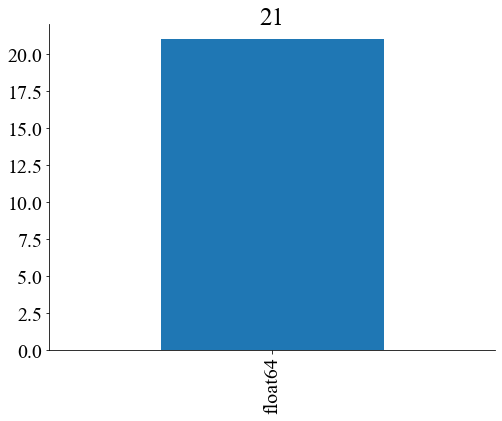

In [169]:
display(dset.head())

display(dset.info())

dset_no_date = dset.drop("date",axis = 1)

plt.figure(figsize = (8,6))
ax = dset_no_date.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 1, height, ha = 'center', size = 25)
sns.despine()


In [170]:
missing = dset.isnull().sum()
missing = missing[missing > 0]
print("Missing values?", len(missing)!=0)
# missing.sort_values(inplace=True)
# missing.plot.bar()

Missing values? False


In [171]:
# "Cardinality" meancategorical_colss the number of unique values in a column
# Categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [colname for colname in dset_no_date.loc[:,:].columns if
                    dset_no_date[colname].nunique() < 8 and 
                    dset_no_date[colname].dtype == "object"]

# All categorical columns
categorical_cols_all = [colname for colname in dset_no_date.loc[:,:].columns if
                    dset_no_date[colname].dtype == "object"]

# Numerical columns
int_cols = [colname for colname in dset_no_date.loc[:,:].columns if 
                dset_no_date[colname].dtype in ['int64']]
float_cols = [colname for colname in dset_no_date.loc[:,:].columns if 
                dset_no_date[colname].dtype in ['float64']]

numerical_cols = int_cols + float_cols

print("Ammount of numerical columns: %s" % len(numerical_cols))
print("\tAmmount of integer columns: {}".format(len(int_cols)))
print("\tAmmount of float columns: {}".format(len(float_cols)))
print("Ammount of categorical columns with less than 8 unique values: %s" % len(categorical_cols))
print("Amount of all categorical columns: %s" % len(categorical_cols_all))

Ammount of numerical columns: 21
	Ammount of integer columns: 0
	Ammount of float columns: 21
Ammount of categorical columns with less than 8 unique values: 0
Amount of all categorical columns: 0


In [175]:
for feat in dset_no_date.columns:
#     print(feat)
    display(dset[feat].describe())

count    52696.000000
mean       989.989233
std          9.207149
min        955.580000
25%        984.800000
50%        990.920000
75%        995.930000
max       1020.070000
Name: p (mbar), dtype: float64

count    52696.000000
mean        10.818241
std          7.468671
min         -6.440000
25%          4.590000
50%         10.230000
75%         16.180000
max         34.800000
Name: T (degC), dtype: float64

count    52696.000000
mean       284.796938
std          7.616995
min        266.190000
25%        278.550000
50%        284.320000
75%        290.260000
max        309.130000
Name: Tpot (K), dtype: float64

count    52696.000000
mean         5.409105
std          5.956722
min        -13.810000
25%          0.777500
50%          5.260000
75%          9.700000
max         20.500000
Name: Tdew (degC), dtype: float64

count    52696.000000
mean        72.487133
std         19.230260
min         21.160000
25%         58.820000
50%         75.400000
75%         87.900000
max        100.000000
Name: rh (%), dtype: float64

count    52696.000000
mean        14.487046
std          7.632960
min          3.770000
25%          8.480000
50%         12.480000
75%         18.420000
max         55.670000
Name: VPmax (mbar), dtype: float64

count    52696.000000
mean         9.676828
std          4.023504
min          2.090000
25%          6.460000
50%          8.890000
75%         12.050000
max         24.160000
Name: VPact (mbar), dtype: float64

count    52696.000000
mean         4.810131
std          5.539320
min          0.000000
25%          1.170000
50%          2.740000
75%          6.440000
max         42.100000
Name: VPdef (mbar), dtype: float64

count    52696.000000
mean         6.111159
std          2.561536
min          1.300000
25%          4.070000
50%          5.610000
75%          7.620000
max         15.400000
Name: sh (g/kg), dtype: float64

count    52696.000000
mean         9.782341
std          4.082684
min          2.090000
25%          6.530000
50%          8.990000
75%         12.200000
max         24.530000
Name: H2OC (mmol/mol), dtype: float64

count    52696.000000
mean      1210.882855
std         36.430222
min       1107.380000
25%       1183.900000
50%       1210.800000
75%       1236.550000
max       1318.520000
Name: rho (g/m**3), dtype: float64

count    52696.000000
mean         1.995935
std         43.596931
min      -9999.000000
25%          1.000000
50%          1.770000
75%          2.920000
max         13.770000
Name: wv (m/s), dtype: float64

count    52696.000000
mean         3.632807
std          2.462467
min          0.000000
25%          1.770000
50%          3.000000
75%          4.850000
max         22.900000
Name: max. wv (m/s), dtype: float64

count    52696.000000
mean       176.850276
std         81.194840
min          0.000000
25%        141.100000
50%        195.500000
75%        226.700000
max        360.000000
Name: wd (deg), dtype: float64

count    52696.000000
mean         0.011773
std          0.123289
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.200000
Name: rain (mm), dtype: float64

count    52696.000000
mean        25.907469
std        111.503420
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        600.000000
Name: raining (s), dtype: float64

count    52696.000000
mean       131.331822
std        215.735116
min          0.000000
25%          0.000000
50%          2.820000
75%        182.900000
max       1115.290000
Name: SWDR (W/m), dtype: float64

count    52696.000000
mean       259.863438
std        422.786515
min          0.000000
25%          0.000000
50%          9.670000
75%        366.437500
max       2131.760000
Name: PAR (mol/m/s), dtype: float64

count    52696.000000
mean       308.601939
std        569.956762
min      -9999.000000
25%          0.000000
50%         13.120000
75%        434.260000
max       2498.940000
Name: max. PAR (mol/m/s), dtype: float64

count    52696.000000
mean        21.515206
std          7.790620
min          6.900000
25%         15.240000
50%         20.440000
75%         26.822500
max         49.090000
Name: Tlog (degC), dtype: float64

count    52696.000000
mean       417.798615
std        321.570015
min      -9999.000000
25%        415.500000
50%        423.200000
75%        437.100000
max        524.200000
Name: OT, dtype: float64

ValueError: num must be 1 <= num <= 12, not 13

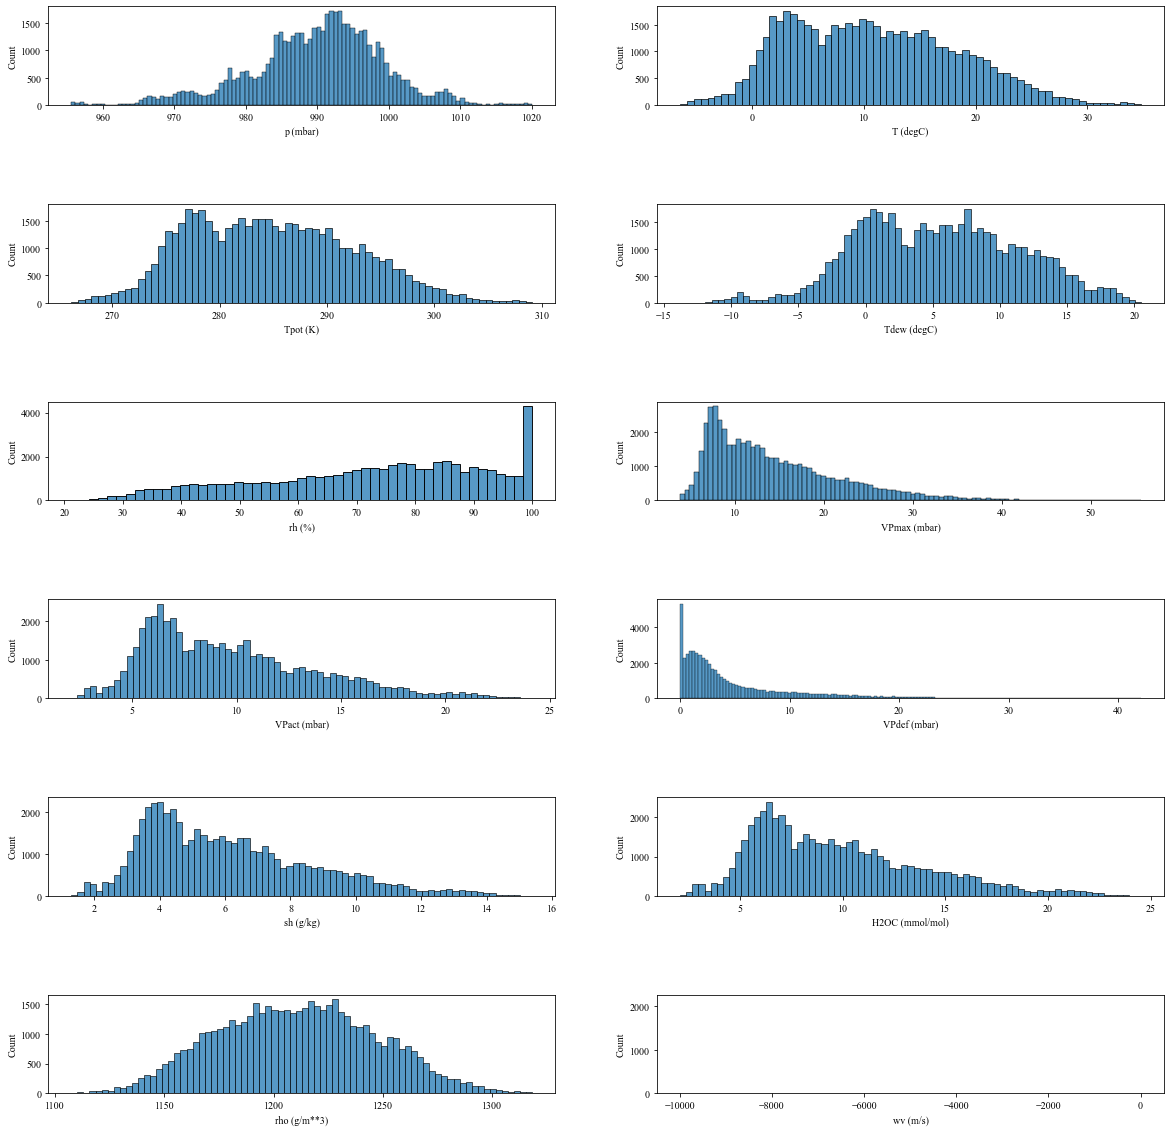

In [173]:
i = 1
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=1)
for feature in float_cols:
    plt.subplot(6,2,i)
    sns.histplot(dset_no_date[feature], palette='Blues_r')
    i = i +1

In [174]:
dset_no_date["0"][0:96].shape

KeyError: '0'

ValueError: num must be 1 <= num <= 12, not 13

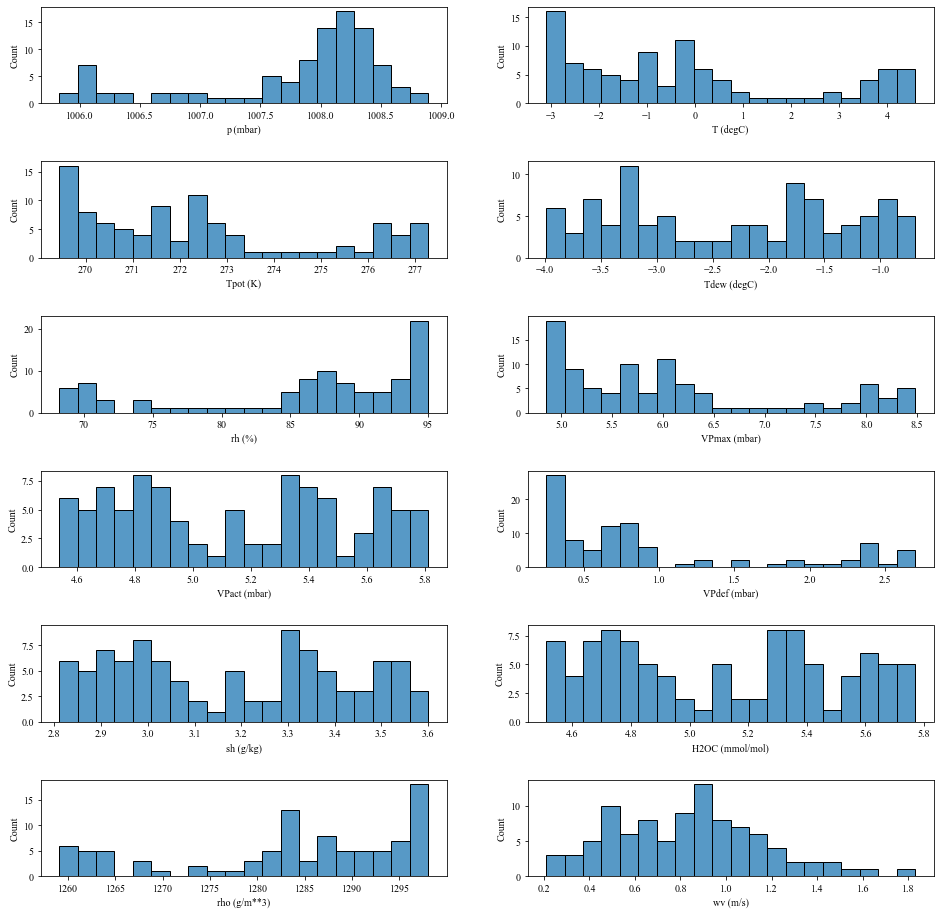

In [176]:
# Checking distribution shifts
# %matplotlib qt5
for time in range(5):
    i = 1
    plt.figure(figsize=(16, 16))
    plt.subplots_adjust(hspace=0.6)
    for feature in float_cols:
        plt.subplot(6,2,i)
        sns.histplot(dset_no_date[feature][time*96:time*96+96], palette='Blues_r', bins=20)
        i = i +1
    plt.suptitle("Time window {}-{}".format(time*96,time*96+96), fontsize=16)
#     plt.tight_layout()
    plt.show()
    
    
    

In [177]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute values
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
                colname = corr_matrix.columns[j]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [178]:
# %matplotlib inline
# %matplotlib qt5 

corr = dset_no_date.corr(method='pearson')
display(corr)

# Visualize variables with correlation higher than a threshold

corr_threshold = 0.0

corr_features = correlation(dset_no_date, corr_threshold)
print(corr_features)
print('correlated features above threshold {}: {}'.format(corr_threshold,len(set(corr_features))))

corr_trunq = corr.where(abs(corr) > corr_threshold, np.nan)
display(corr_trunq.style.background_gradient(cmap='viridis',vmin=-1,vmax=1) )



,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m),PAR (mol/m/s),max. PAR (mol/m/s),Tlog (degC),OT
p (mbar),1.000000,-0.127305,-0.223450,-0.207280,-0.068386,-0.098905,-0.183765,-0.002805,-0.200955,-0.201174,...,-0.010172,-0.229759,-0.129084,-0.071890,-0.135033,0.073811,0.067915,0.048888,-0.082453,-0.003537
T (degC),-0.127305,1.000000,0.995228,0.782740,-0.540784,0.967901,0.762860,0.779616,0.761550,0.761934,...,0.007514,0.109162,-0.061356,0.008448,-0.048777,0.448607,0.459806,0.399064,0.981562,-0.039150
Tpot (K),-0.223450,0.995228,1.000000,0.789478,-0.524880,0.961013,0.767773,0.766556,0.768193,0.768590,...,0.008397,0.130117,-0.047439,0.015404,-0.034742,0.433570,0.445155,0.387362,0.972736,-0.038117
Tdew (degC),-0.207280,0.782740,0.789478,1.000000,0.087203,0.712665,0.977413,0.272064,0.976878,0.977256,...,0.000130,-0.110783,0.022842,0.069465,0.094311,0.104446,0.117344,0.106536,0.741963,-0.001944
rh (%),-0.068386,-0.540784,-0.524880,0.087203,1.000000,-0.561612,0.085528,-0.836007,0.086812,0.086729,...,-0.012581,-0.347825,0.115019,0.087426,0.228862,-0.558295,-0.558661,-0.483217,-0.558603,0.051064
VPmax (mbar),-0.098905,0.967901,0.961013,0.712665,-0.561612,1.000000,0.712554,0.860390,0.711273,0.711482,...,0.006312,0.095102,-0.068674,-0.001426,-0.062691,0.466474,0.478430,0.412244,0.962748,-0.059629
VPact (mbar),-0.183765,0.762860,0.767773,0.977413,0.085528,0.712554,1.000000,0.255506,0.999814,0.999816,...,-0.000390,-0.122343,0.013970,0.073675,0.089040,0.101192,0.113418,0.100975,0.727446,0.000709
VPdef (mbar),-0.002805,0.779616,0.766556,0.272064,-0.836007,0.860390,0.255506,1.000000,0.253875,0.254162,...,0.008982,0.219911,-0.104771,-0.055481,-0.151059,0.569282,0.576877,0.494714,0.798241,-0.082684
sh (g/kg),-0.200955,0.761550,0.768193,0.976878,0.086812,0.711273,0.999814,0.253875,1.000000,0.999997,...,-0.000211,-0.117849,0.016267,0.075156,0.091335,0.099126,0.111392,0.099406,0.725602,0.000849
H2OC (mmol/mol),-0.201174,0.761934,0.768590,0.977256,0.086729,0.711482,0.999816,0.254162,0.999997,1.000000,...,-0.000203,-0.117755,0.016316,0.075122,0.091395,0.099238,0.111511,0.099524,0.725934,0.000828


{'VPmax (mbar)', 'max. wv (m/s)', 'rh (%)', 'OT', 'sh (g/kg)', 'PAR (mol/m/s)', 'Tpot (K)', 'T (degC)', 'H2OC (mmol/mol)', 'p (mbar)', 'max. PAR (mol/m/s)', 'rho (g/m**3)', 'Tdew (degC)', 'rain (mm)', 'VPdef (mbar)', 'raining (s)', 'SWDR (W/m)', 'wd (deg)', 'Tlog (degC)', 'wv (m/s)', 'VPact (mbar)'}
correlated features above threshold 0.0: 21


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m),PAR (mol/m/s),max. PAR (mol/m/s),Tlog (degC),OT
p (mbar),1.000000,-0.127305,-0.223450,-0.207280,-0.068386,-0.098905,-0.183765,-0.002805,-0.200955,-0.201174,0.437434,-0.010172,-0.229759,-0.129084,-0.071890,-0.135033,0.073811,0.067915,0.048888,-0.082453,-0.003537
T (degC),-0.127305,1.000000,0.995228,0.782740,-0.540784,0.967901,0.762860,0.779616,0.761550,0.761934,-0.946510,0.007514,0.109162,-0.061356,0.008448,-0.048777,0.448607,0.459806,0.399064,0.981562,-0.039150
Tpot (K),-0.223450,0.995228,1.000000,0.789478,-0.524880,0.961013,0.767773,0.766556,0.768193,0.768590,-0.973132,0.008397,0.130117,-0.047439,0.015404,-0.034742,0.433570,0.445155,0.387362,0.972736,-0.038117
Tdew (degC),-0.207280,0.782740,0.789478,1.000000,0.087203,0.712665,0.977413,0.272064,0.976878,0.977256,-0.798148,0.000130,-0.110783,0.022842,0.069465,0.094311,0.104446,0.117344,0.106536,0.741963,-0.001944
rh (%),-0.068386,-0.540784,-0.524880,0.087203,1.000000,-0.561612,0.085528,-0.836007,0.086812,0.086729,0.440074,-0.012581,-0.347825,0.115019,0.087426,0.228862,-0.558295,-0.558661,-0.483217,-0.558603,0.051064
VPmax (mbar),-0.098905,0.967901,0.961013,0.712665,-0.561612,1.000000,0.712554,0.860390,0.711273,0.711482,-0.900199,0.006312,0.095102,-0.068674,-0.001426,-0.062691,0.466474,0.478430,0.412244,0.962748,-0.059629
VPact (mbar),-0.183765,0.762860,0.767773,0.977413,0.085528,0.712554,1.000000,0.255506,0.999814,0.999816,-0.771779,-0.000390,-0.122343,0.013970,0.073675,0.089040,0.101192,0.113418,0.100975,0.727446,0.000709
VPdef (mbar),-0.002805,0.779616,0.766556,0.272064,-0.836007,0.860390,0.255506,1.000000,0.253875,0.254162,-0.679846,0.008982,0.219911,-0.104771,-0.055481,-0.151059,0.569282,0.576877,0.494714,0.798241,-0.082684
sh (g/kg),-0.200955,0.761550,0.768193,0.976878,0.086812,0.711273,0.999814,0.253875,1.000000,0.999997,-0.776002,-0.000211,-0.117849,0.016267,0.075156,0.091335,0.099126,0.111392,0.099406,0.725602,0.000849
H2OC (mmol/mol),-0.201174,0.761934,0.768590,0.977256,0.086729,0.711482,0.999816,0.254162,0.999997,1.000000,-0.776427,-0.000203,-0.117755,0.016316,0.075122,0.091395,0.099238,0.111511,0.099524,0.725934,0.000828


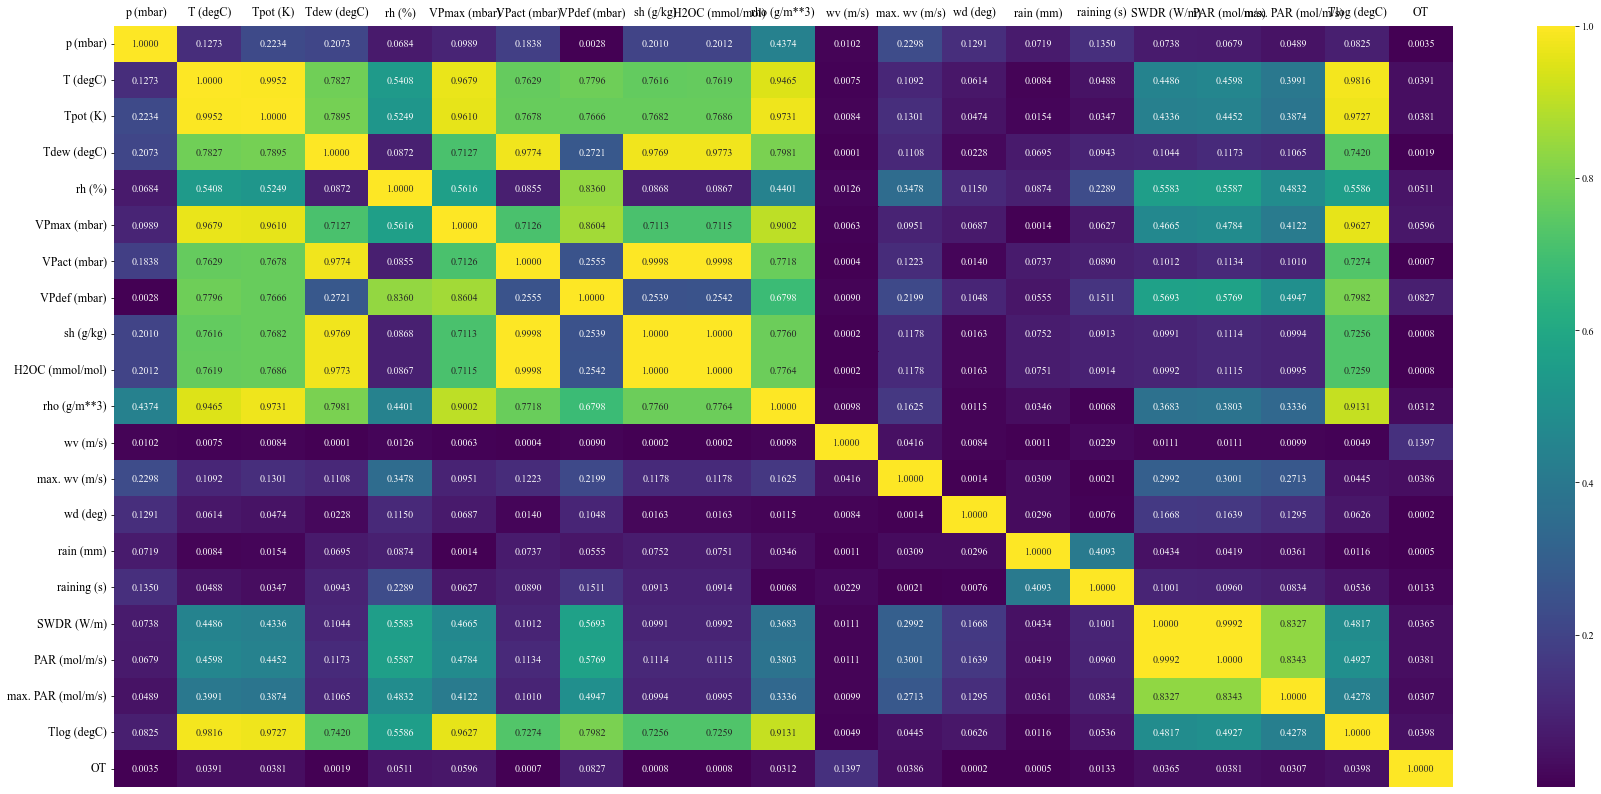

In [182]:
# %matplotlib qt5 

fig = plt.figure(figsize=(30,14))
sns.heatmap(abs(corr), annot = True, fmt = '.4f', cmap="viridis")
plt.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
# plt.xticks(rotation=90)
plt.show()


1 : mean: 1.6341, std: 0.1615, skew: 0.5608


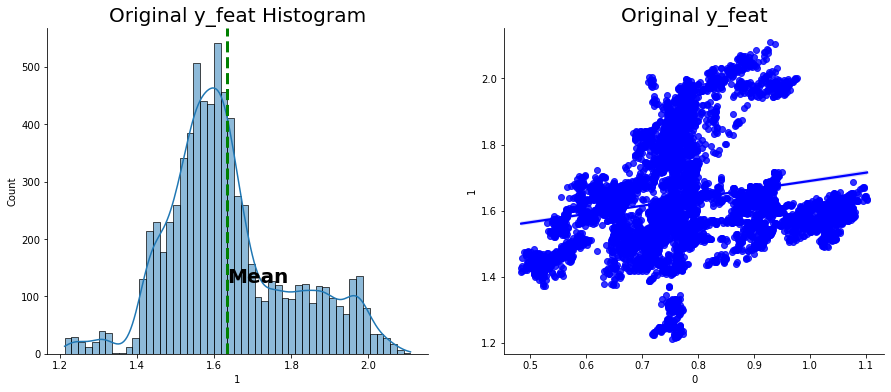

In [17]:
x_feat = "0"
y_feat = "1"

plt.figure(figsize = (15,6))
ax1 = plt.subplot(1,2,1)
sns.histplot(dset_no_date[y_feat],palette='Blues_r',kde=True)
plt.axvline(x=dset_no_date[y_feat].mean(), color='g', linestyle='--', linewidth=3)
plt.text(dset_no_date[y_feat].mean(), 125, "Mean", horizontalalignment='left', size=20, color='black', weight='semibold')
plt.title('Original y_feat Histogram',fontsize=20)
ax2 = plt.subplot(1,2,2)
sns.regplot(data=dset_no_date, y=y_feat, x=x_feat ,ax=ax2,color='Blue')
ax2.set_title('Original y_feat',fontsize=20)
sns.despine()

mean = dset_no_date[y_feat].mean()
std = dset_no_date[y_feat].std()
skew = dset_no_date[y_feat].skew()
print(y_feat,': mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}'.format(mean, std, skew))
plt.show()

# Periodicity

In [183]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                52696 non-null  datetime64[ns]
 1   p (mbar)            52696 non-null  float64       
 2   T (degC)            52696 non-null  float64       
 3   Tpot (K)            52696 non-null  float64       
 4   Tdew (degC)         52696 non-null  float64       
 5   rh (%)              52696 non-null  float64       
 6   VPmax (mbar)        52696 non-null  float64       
 7   VPact (mbar)        52696 non-null  float64       
 8   VPdef (mbar)        52696 non-null  float64       
 9   sh (g/kg)           52696 non-null  float64       
 10  H2OC (mmol/mol)     52696 non-null  float64       
 11  rho (g/m**3)        52696 non-null  float64       
 12  wv (m/s)            52696 non-null  float64       
 13  max. wv (m/s)       52696 non-null  float64   

In [184]:
display(dset.info())
dset_date_as_index = dset.set_index(dset.date, inplace=False)
display(dset_date_as_index.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                52696 non-null  datetime64[ns]
 1   p (mbar)            52696 non-null  float64       
 2   T (degC)            52696 non-null  float64       
 3   Tpot (K)            52696 non-null  float64       
 4   Tdew (degC)         52696 non-null  float64       
 5   rh (%)              52696 non-null  float64       
 6   VPmax (mbar)        52696 non-null  float64       
 7   VPact (mbar)        52696 non-null  float64       
 8   VPdef (mbar)        52696 non-null  float64       
 9   sh (g/kg)           52696 non-null  float64       
 10  H2OC (mmol/mol)     52696 non-null  float64       
 11  rho (g/m**3)        52696 non-null  float64       
 12  wv (m/s)            52696 non-null  float64       
 13  max. wv (m/s)       52696 non-null  float64   

None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52696 entries, 2020-01-01 00:10:00 to 2021-01-01 00:00:00
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                52696 non-null  datetime64[ns]
 1   p (mbar)            52696 non-null  float64       
 2   T (degC)            52696 non-null  float64       
 3   Tpot (K)            52696 non-null  float64       
 4   Tdew (degC)         52696 non-null  float64       
 5   rh (%)              52696 non-null  float64       
 6   VPmax (mbar)        52696 non-null  float64       
 7   VPact (mbar)        52696 non-null  float64       
 8   VPdef (mbar)        52696 non-null  float64       
 9   sh (g/kg)           52696 non-null  float64       
 10  H2OC (mmol/mol)     52696 non-null  float64       
 11  rho (g/m**3)        52696 non-null  float64       
 12  wv (m/s)            52696 non-null  float64       
 13  max. wv (m/

None

In [185]:
dset.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m),PAR (mol/m/s),max. PAR (mol/m/s),Tlog (degC),OT
count,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,...,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000
mean,989.989233,10.818241,284.796938,5.409105,72.487133,14.487046,9.676828,4.810131,6.111159,9.782341,...,1.995935,3.632807,176.850276,0.011773,25.907469,131.331822,259.863438,308.601939,21.515206,417.798615
std,9.207149,7.468671,7.616995,5.956722,19.230260,7.632960,4.023504,5.539320,2.561536,4.082684,...,43.596931,2.462467,81.194840,0.123289,111.503420,215.735116,422.786515,569.956762,7.790620,321.570015
min,955.580000,-6.440000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,2.090000,...,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,6.900000,-9999.000000
25%,984.800000,4.590000,278.550000,0.777500,58.820000,8.480000,6.460000,1.170000,4.070000,6.530000,...,1.000000,1.770000,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,15.240000,415.500000
50%,990.920000,10.230000,284.320000,5.260000,75.400000,12.480000,8.890000,2.740000,5.610000,8.990000,...,1.770000,3.000000,195.500000,0.000000,0.000000,2.820000,9.670000,13.120000,20.440000,423.200000
75%,995.930000,16.180000,290.260000,9.700000,87.900000,18.420000,12.050000,6.440000,7.620000,12.200000,...,2.920000,4.850000,226.700000,0.000000,0.000000,182.900000,366.437500,434.260000,26.822500,437.100000
max,1020.070000,34.800000,309.130000,20.500000,100.000000,55.670000,24.160000,42.100000,15.400000,24.530000,...,13.770000,22.900000,360.000000,11.200000,600.000000,1115.290000,2131.760000,2498.940000,49.090000,524.200000


## Check if series are stationary

https://www.statsmodels.org/stable/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

https://stats.stackexchange.com/questions/30569/what-is-the-difference-between-a-stationary-test-and-a-unit-root-test/235916#235916

In [3]:
# p-valjue: how likely it is that your data would have occurred under the null hypothesis. If p-value less or equal 
# than 0.05 (95% confidence interval), the result is statistically significant, indicating the evidence is strong 
# enough to reject the null hypothesis in favor of the alternative hypothesis


# ADF: Critical value (test statistic) of the data
# Null hypothesis: there is a unit root, hence non Stationarity exists in the series.
# Alternative Hypothesis: Stationarity exists in the series
# If critical value (test statistic) is lower than t-values, null hypothesis can be rejected, indicating stationarity

def check_stationarity_adf(series):
    result = adfuller(series.values)

    print('\tADF Statistic: %f' % result[0])
    print('\tp-value: %f' % result[1])
    print('\tCritical Values:')
    for key, value in result[4].items():
        print('\t\t%s: %.3f' % (key, value))
        
    if (result[1] < 0.05 and result[0] < result[4]['5%']):
        print("\tWe can reject the null hypothesis: Stationary")
        out = 0

    else:
        print("\tNon-stationary. Null hypothesis cannot be rejected with 95% confidence interval")
        out = 1
    return out

# KPSS: Critical value (test statistic) of the data 
# Null hypothesis: The process is trend stationary
# Alternative Hypothesis: The series has a unit root (series is not stationary)
# If critical value (test statistic) is greater than t-values, null hypothesis can be rejected, indicating non-stationarity

def check_stationarity_kpss(series):
    result = kpss(series.values, nlags="auto")

    print('\tKPSS Statistic: %f' % result[0])
    print('\tp-value: %f' % result[1])
    print('\tCritical Values:')
    for key, value in result[3].items():
        print('\t\t%s: %.3f' % (key, value))
        
    if (result[1] < 0.05 and result[0] > result[3]['5%']):
        print("\tWe can reject the null hypothesis: Non-stationary")
        out = 1

    else:
        print("\tNull hypothesis cannot be rejected with 95% confidence interval: series is stationary (trend stationary)")
        out = 0
    return out

# Cases:
#     Case 1: Both tests conclude that the series is not stationary - The series is not stationary
#     Case 2: Both tests conclude that the series is stationary - The series is stationary
#     Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend 
#         needs to be removed to make series strict stationary. The detrended series is checked for stationarity.
#     Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. 
#         Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

In [1]:
# Case 4 Reject unit root, reject stationarity: both hypotheses are component hypotheses – heteroskedasticity 
# in a series may make a big difference; if there is structural break it will affect inference.

# KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing 
# is to be used to make series stationary. The differenced series is checked for stationarity.
dataset_key = "exchange_rate"
dset = datasets[dataset_key]

n_stationary_adf = 0
n_stationary_kpss = 0
for feat in dset.drop("date",axis = 1).columns:
    print("Analyzing feature  {}".format(feat))
    n_stationary_adf+=check_stationarity_adf(dset[feat])
    n_stationary_kpss+=check_stationarity_kpss(dset[feat])
    
print("Number of non-stationary series within dataset {} according to ADF: {}".format(dataset_key, n_stationary_adf))
print("Number of non-stationary series within dataset {} according to KPSS: {}".format(dataset_key, n_stationary_kpss))

In [2]:
# If we apply differencing on the data, both test imply the differenced dataset is stationary, which indicates it was
# indeed case 4.

n_stationary_adf = 0
n_stationary_kpss = 0
for feat in dset.drop("date",axis = 1).columns:
    print("Analyzing feature  {}".format(feat))
    n_stationary_adf+=check_stationarity_adf((dset[feat]-dset[feat].shift(1)).dropna())
    n_stationary_kpss+=check_stationarity_kpss((dset[feat]-dset[feat].shift(1)).dropna())
    
print("Number of non-stationary series within dataset {} according to ADF: {}".format(dataset_key, n_stationary_adf))
print("Number of non-stationary series within dataset {} according to KPSS: {}".format(dataset_key, n_stationary_kpss))


## Looking for periodicities through acf and pacf

https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf#Periodical 

https://itsudit.medium.com/deciphering-acf-and-pacf-plots-a-guide-to-time-series-forecasting-3323948935fb

In [5]:
from cycler import cycler
from matplotlib.lines import Line2D

%matplotlib inline 

# from cycler import cycler
# from matplotlib.colors import TABLEAU_COLORS
# custom_cycler = (cycler(color=[key for key in TABLEAU_COLORS.keys()][:dset_no_date.shape[1]])+
#                  cycler(marker=[key for key in Line2D.markers.keys()][:dset_no_date.shape[1]]))

# plt.rc('axes', prop_cycle=custom_cycler)

data_path = "dataset/"
datasets = dict()
# For national_illness OT is Total Patients
# For ETT, OT is Oil temperature
for f in ["electricity.csv", "ETTh1.csv", "ETTh2.csv", "ETTm1.csv", "ETTm2.csv", "exchange_rate.csv", "national_illness.csv", "traffic.csv", "weather.csv"]:
    dataset = pd.read_csv(data_path+f)
    datasets[f.replace(".csv","")] = dataset
    print(f.replace(".csv",""), datasets[f.replace(".csv","")].shape)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 16})

electricity (26304, 322)
ETTh1 (17420, 8)
ETTh2 (17420, 8)
ETTm1 (69680, 8)
ETTm2 (69680, 8)
exchange_rate (7588, 9)
national_illness (966, 8)
traffic (17544, 863)
weather (52696, 22)


In [78]:
markers = [key for key in Line2D.markers.keys()]
markers.remove(",")

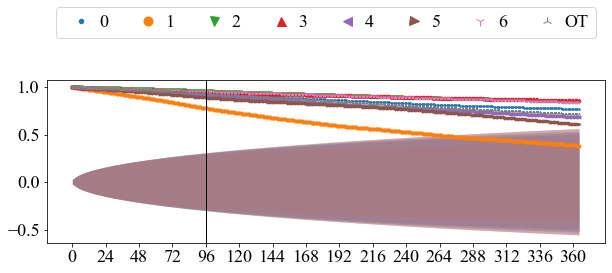

In [166]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 18})

for dataset_key in ["exchange_rate"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    weeks = 52
    fig, ax = plt.subplots(1, figsize=(10,3))
    lags=weeks*7

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_acf(dset[feat], use_vlines=False, adjusted=True, zero=True, lags=lags, ax=ax, alpha=0.05, marker=marker, markersize=3)

    ax.set_xticks(np.arange(0,lags+1,24)) # x in days
    ax.set_title("")
    ax.axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
    plt.legend(dset.drop("date",axis = 1).columns, loc="lower left", mode = "expand", ncol = len(dset.drop("date",axis = 1).columns), bbox_to_anchor=(0, 1.2, 1, 4), handletextpad=0, markerscale=3)
    
    if save:
        plt.savefig(path+"\{}_acf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")

    plt.show()


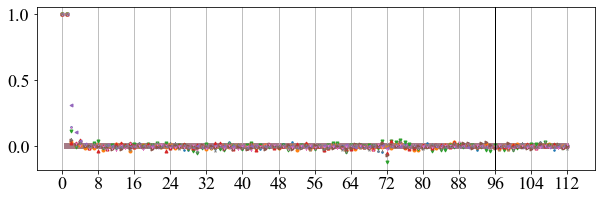

In [149]:
for dataset_key in ["exchange_rate"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    weeks = 16
    fig, ax = plt.subplots(1, figsize=(10,3))
    lags=weeks*7

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_pacf(dset[feat], use_vlines=False, zero=True, lags=lags, ax=ax, alpha=0.05, marker=marker, markersize=3)

    ax.set_xticks(np.arange(0,lags+1,8)) # x in days
    ax.set_title("")
    ax.axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
#     plt.legend(dset.drop("date",axis = 1).columns, loc="lower left", mode = "expand", ncol = len(dset.drop("date",axis = 1).columns), bbox_to_anchor=(0, 1, 1, 4), handletextpad=0)
    plt.grid(axis='x')
    
    if save:
        plt.savefig(path+"\{}_pacf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")
    
    plt.show()


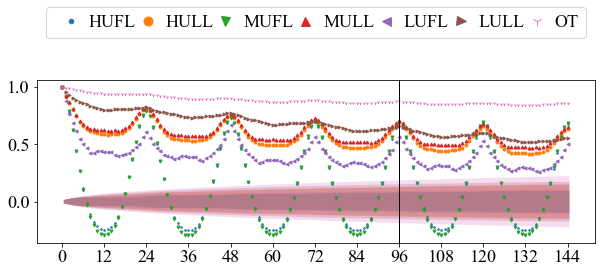

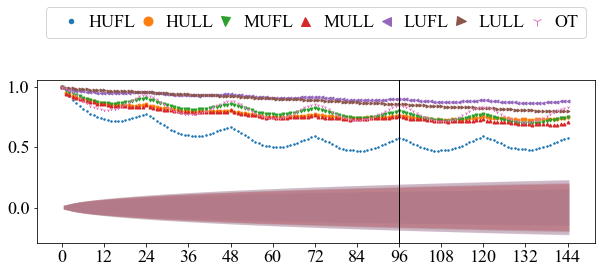

In [167]:
for dataset_key in ["ETTh1", "ETTh2"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    days = 6
    fig, ax = plt.subplots(1, figsize=(10,3))
    lags=24*days

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_acf(dset[feat], use_vlines=False, adjusted=True, zero=True, lags=lags, ax=ax, alpha=0.05, marker=marker, markersize=3)

    ax.set_xticks(np.arange(0,lags+1,12)) # x in hours
    ax.set_title("")
    ax.axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
    # plt.tight_layout()
    plt.legend(dset.drop("date",axis = 1).columns, loc="lower left", mode = "expand", ncol = len(dset.drop("date",axis = 1).columns), bbox_to_anchor=(0, 1.2, 1, 4), handletextpad=0.0, markerscale=3)

    if save:
        plt.savefig(path+"\{}_acf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")

    plt.show()


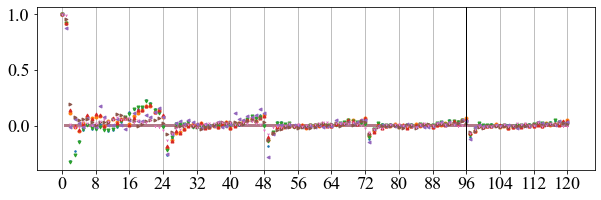

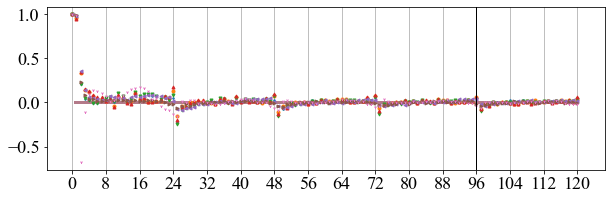

In [150]:
for dataset_key in ["ETTh1", "ETTh2"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    days = 5
    fig, ax = plt.subplots(1, figsize=(10,3))
    lags=24*days

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_pacf(dset[feat], use_vlines=False, zero=True, lags=lags, ax=ax, alpha=0.05, marker=marker, markersize=3)

    ax.set_xticks(np.arange(0,lags+1,8)) # x in hours
    ax.set_title("")
    ax.axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
#     plt.legend(dset.drop("date",axis = 1).columns, loc="lower left", mode = "expand", ncol = len(dset.drop("date",axis = 1).columns), bbox_to_anchor=(0, 1, 1, 4), handletextpad=0.0)
    plt.grid(axis='x')

    if save:
        plt.savefig(path+"\{}_pacf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")

    plt.show()


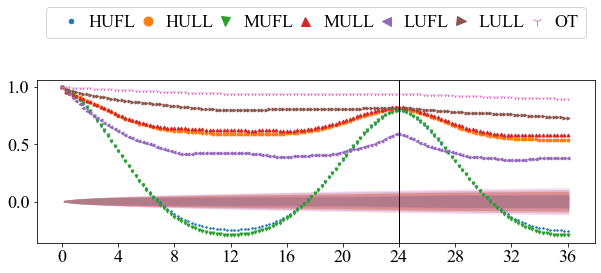

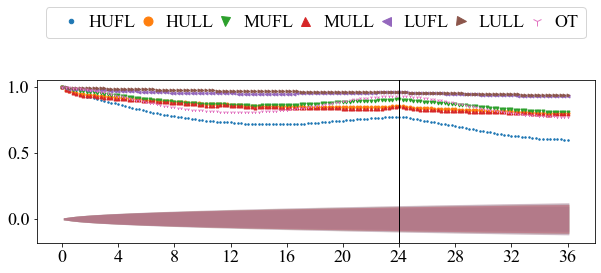

In [168]:
for dataset_key in ["ETTm1", "ETTm2"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    days = 1.5
    fig, ax = plt.subplots(1, figsize=(10,3))
    lags=24*days*4

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_acf(dset[feat], use_vlines=False, adjusted=True, zero=True, lags=lags, ax=ax, alpha=0.05, marker=marker, markersize=3)

    ax.set_xticks(np.arange(0,lags+1,16))
    ax.set_xticklabels((ax.get_xticks()*15/60).astype("int32")) # x in hours
    ax.set_title("")
    ax.axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
    plt.legend(dset.drop("date",axis = 1).columns, loc="lower left", mode = "expand", ncol = len(dset.drop("date",axis = 1).columns), bbox_to_anchor=(0, 1.2, 1, 4), handletextpad=0.0, markerscale=3)

    if save:
        plt.savefig(path+"\{}_acf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")

    plt.show()


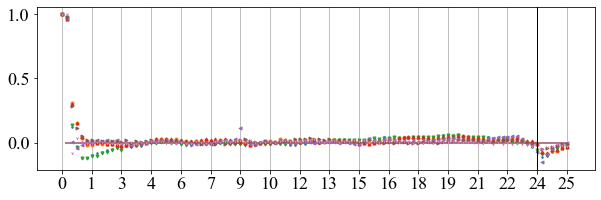

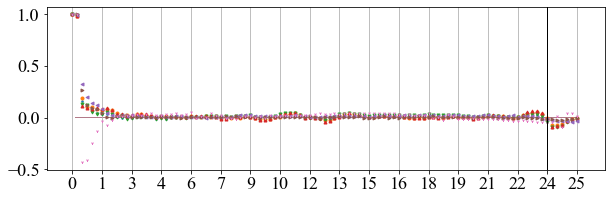

In [151]:
for dataset_key in ["ETTm1", "ETTm2"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    days = 1
    fig, ax = plt.subplots(1, figsize=(10,3))
    lags=24*days*4

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_pacf(dset[feat], use_vlines=False, zero=True, lags=lags+6, ax=ax, alpha=0.05, marker=marker, markersize=3)

    ax.set_xticks(np.arange(0,lags+1+6,6))
    ax.set_xticklabels((ax.get_xticks()*15/60).astype("int32")) # x in hours
    ax.set_title("")
    ax.axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
#     plt.legend(dset.drop("date",axis = 1).columns, loc="lower left", mode = "expand", ncol = len(dset.drop("date",axis = 1).columns), bbox_to_anchor=(0, 1, 1, 4), handletextpad=0.0)
    plt.grid(axis='x')

    if save:
        plt.savefig(path+"\{}_pacf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")

    plt.show()


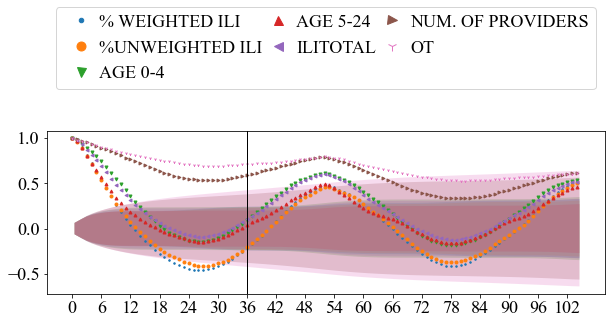

In [169]:
for dataset_key in ["national_illness"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    weeks = 104
    fig, ax = plt.subplots(1, figsize=(10,3))
    lags=weeks

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_acf(dset[feat], use_vlines=False, adjusted=True, zero=True, lags=lags, ax=ax, alpha=0.05, marker=marker, markersize=3)

    ax.set_xticks(np.arange(0,lags+1,6)) # x in weeks
    ax.set_title("")
    ax.axvline(x = 36, color = 'black', label = 'axvline - full height', lw=1)
    plt.legend(dset.drop("date",axis = 1).columns, loc="lower left", mode = "expand", ncol = 3, bbox_to_anchor=(0, 1.2, 1, 4), handletextpad=0.0, markerscale=3)
    
    if save:
        plt.savefig(path+"\{}_acf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")

    plt.show()


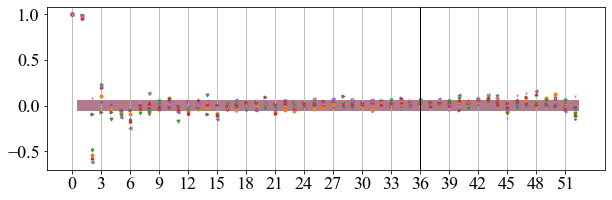

In [165]:
for dataset_key in ["national_illness"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    weeks = 52
    fig, ax = plt.subplots(1, figsize=(10,3))
    lags=weeks

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_pacf(dset[feat], use_vlines=False, zero=True, lags=lags, ax=ax, alpha=0.05, marker=marker, markersize=3)

    ax.set_xticks(np.arange(0,lags+1,3)) # x in weeks
    ax.set_title("")
    ax.axvline(x = 36, color = 'black', label = 'axvline - full height', lw=1)
    plt.grid(axis='x')
#     plt.legend(dset.drop("date",axis = 1).columns, loc="lower left", mode = "expand", ncol = 3, bbox_to_anchor=(0, 1, 1, 4), handletextpad=0.0)
    
    if save:
        plt.savefig(path+"\{}_pacf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")

    plt.show()


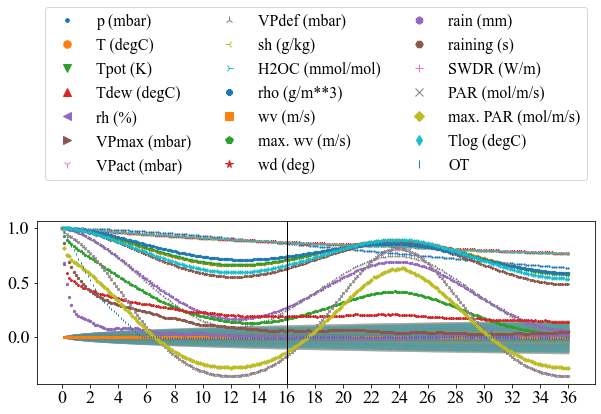

In [170]:
for dataset_key in ["weather"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    days = 1.5
    fig, ax = plt.subplots(1, figsize=(10,3))
    lags=days*24*6

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_acf(dset[feat], use_vlines=False, adjusted=True, zero=True, lags=lags, ax=ax, alpha=0.05, marker=marker, markersize=2.5)

    ax.set_xticks(np.arange(0,lags+1,12))
    ax.set_xticklabels((ax.get_xticks()*10/60).astype("int32")) # x in hours
    ax.set_title("")
    ax.axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
#     plt.legend(dset.drop("date",axis = 1).columns, loc="center right")
    plt.legend(dset.drop("date",axis = 1).columns, loc="lower left", mode = "expand", ncol = 3, bbox_to_anchor=(0, 1.2, 1, 4), fontsize="16", markerscale=3)
    
    if save:
        plt.savefig(path+"\{}_acf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")

    plt.show()


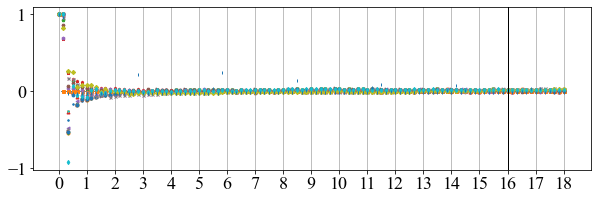

In [153]:
for dataset_key in ["weather"]:
    dset = datasets[dataset_key]
    dset.date = pd.to_datetime(dset.date, unit='ns')
    path = "figures/datasets"
    dset_no_date = dset.drop("date",axis = 1)

    save = 0
    days = 0.75
    fig, ax = plt.subplots(1, figsize=(10,3))
    lags=days*24*6

    for feat, marker in zip(dset.drop("date",axis = 1).columns, markers):
        plot_pacf(dset[feat], use_vlines=False, zero=True, lags=lags, ax=ax, alpha=0.05, marker=marker, markersize=3)

    ax.set_xticks(np.arange(0,lags+1,6))
    ax.set_xticklabels((ax.get_xticks()*10/60).astype("int32")) # x in hours
    ax.set_title("")
    ax.axvline(x = 96, color = 'black', label = 'axvline - full height', lw=1)
    plt.grid(axis='x')
#     plt.legend(dset.drop("date",axis = 1).columns, loc="lower left", mode = "expand", ncol = 3, bbox_to_anchor=(0, 1, 1, 4), fontsize="16")
    
    if save:
        plt.savefig(path+"\{}_pacf.pdf".format(dataset_key), format="pdf", bbox_inches="tight")

    plt.show()


## Looking for periodicities through Fourier transform

https://freedium.cfd/https://medium.com/@shashindra3/three-ways-to-find-the-period-of-a-timeseries-251a6c8c4a3e

https://qingkaikong.blogspot.com/2017/01/signal-processing-finding-periodic.html

In [5]:
for feat in dset.drop(["date"],axis = 1).columns:
    # Calculate the Fourier transform
    yf = np.fft.fft(dset[feat].values)
    xf = np.linspace(0.0, 1.0/(2.0), len(dset[feat].values)//2)

    # Find the dominant frequency
    # We have to drop the first element of the fft as it corresponds to the 
    # DC component or the average value of the signal
    idx = np.argmax(np.abs(yf[1:len(dset[feat].values)//2]))
    freq = xf[idx]

    period =(1/freq)
    print("The peak period of the time series {} with freq = {:.4f} is {} hours = to {:.4f} days = {:.4f} months".format(feat, freq, period, period/24, period/24/30))
    

In [41]:
%matplotlib inline 

freq, power = periodogram(dset.HUFL)
period = 1/freq[np.argmax(power)]
print(f"The period of the time series is {period}")

plt.plot(freq, power)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'HUFL'

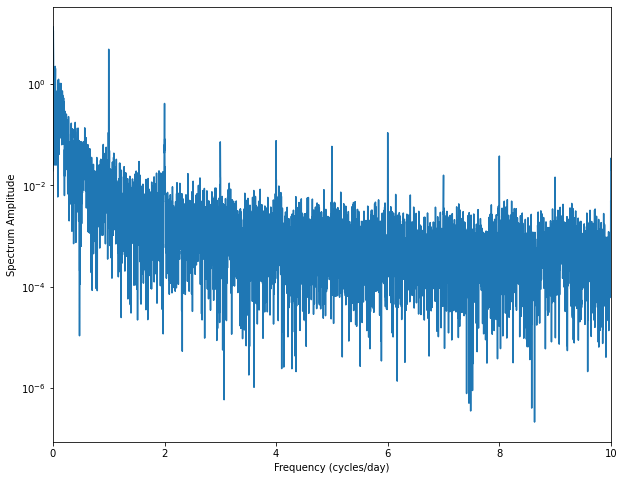

145.16666666666666
181.45833333333331
362.91666666666663
120.9722222222222
0.9997704315886133


In [25]:
fs = 24
f, Pxx = signal.periodogram(dset.HUFL.values - np.mean(dset.HUFL.values), fs = fs, window='hanning', scaling='spectrum')
plt.figure(figsize = (10, 8))
plt.plot(f, Pxx)
plt.xlim(0, 10)
plt.yscale('log')
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Spectrum Amplitude')
plt.show()


# print the top 6 period in the signal
for amp_arg in np.argsort(np.abs(Pxx))[::-1][1:6]:
    day = 1 / f[amp_arg]
    print(day)

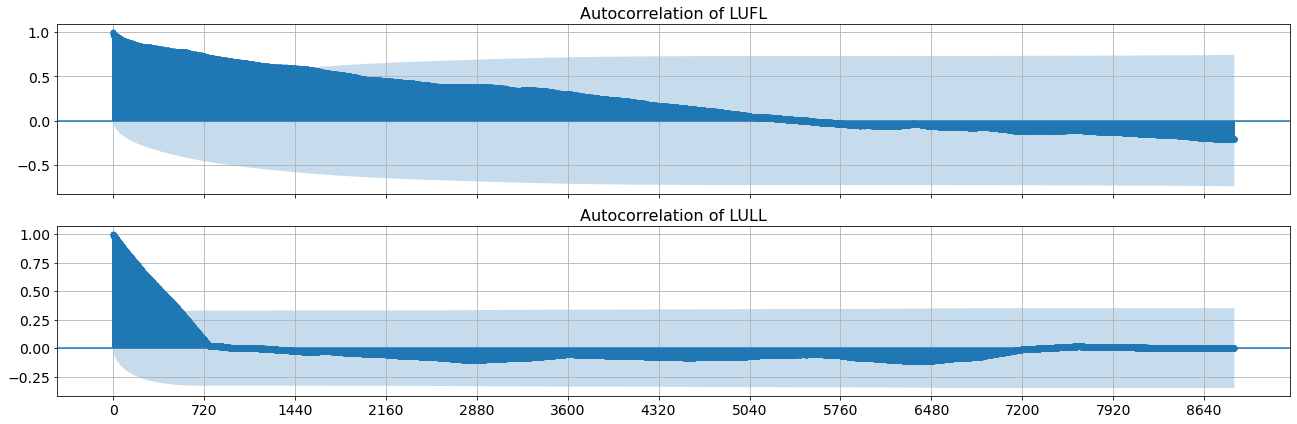

In [26]:
%matplotlib inline

n_feats = dset.drop(["date", "HUFL", "HULL", "MUFL", "MULL", "OT"],axis = 1).columns.size
days = 370
fig, axis = plt.subplots(n_feats, figsize=(18, 3*n_feats), sharex=True)
fig.subplots_adjust(hspace=0.5)

for ax, feat in zip(axis, dset.drop(["date", "HUFL", "HULL", "MUFL", "MULL", "OT"],axis = 1).columns):
    plot_acf(dset[feat], use_vlines=True, adjusted=False, zero=True, lags=24*days, ax=ax, alpha=0.05)
    ax.set_xticks(np.arange(0,24*days+1,24*30))
    ax.tick_params(labelsize=14)
    ax.set_title("Autocorrelation of {}".format(feat), fontsize = 16)
    ax.grid()

plt.tight_layout()
plt.show()